# This code will try to predict COVID positivity from radiography images
Data downloaded from - https://www.kaggle.com/tawsifurrahman/covid19-radiography-database

**Actual Data Source** - -M.E.H. Chowdhury, T. Rahman, A. Khandakar, R. Mazhar, M.A. Kadir, Z.B. Mahbub, K.R. Islam, M.S. Khan, A. Iqbal, N. Al-Emadi, M.B.I. Reaz, M. T. Islam, “Can AI help in screening Viral and COVID-19 pneumonia?” IEEE Access, Vol. 8, 2020, pp. 132665 - 132676. 
-Rahman, T., Khandakar, A., Qiblawey, Y., Tahir, A., Kiranyaz, S., Kashem, S.B.A., Islam, M.T., Maadeed, S.A., Zughaier, S.M., Khan, M.S. and Chowdhury, M.E., 2020. Exploring the Effect of Image Enhancement Techniques on COVID-19 Detection using Chest X-ray Images. 

## We want to understand if we can differentiate images of normal lungs from images of lungs with viral pneumonia using image segmentation.

In [73]:
#Importing packages
import tensorflow.keras
import tensorflow as tf
import os
import numpy as np
import pandas as pd
import random
import seaborn as sns

import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.layers import *
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import *
from tensorflow.keras.losses import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical

from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix,roc_auc_score,confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [74]:
 #setting the seed for random number generation so that the same seed appear every time
from numpy.random import seed
seed(1)

import tensorflow
tensorflow.random.set_seed(2)

In [75]:
#Defining path for normal and covid patients
normal_path = '/Users/soutick/Documents/2020_08_09_job_hunt/COVID_19_Radiography_image_dataset/COVID-19_Radiography_Dataset/Normal'
pneumonia_path = '/Users/soutick/Documents/2020_08_09_job_hunt/COVID_19_Radiography_image_dataset/COVID-19_Radiography_Dataset/Viral Pneumonia'

In [76]:
pwd

'/Users/soutick/Documents/2020_08_09_job_hunt/COVID_19_Radiography_image_dataset/COVID-19_Radiography_Dataset'

In [77]:
random.seed(42)
no_of_sample_in_p=len(os.listdir('/Users/soutick/Documents/2020_08_09_job_hunt/COVID_19_Radiography_image_dataset/COVID-19_Radiography_Dataset/Viral Pneumonia'))
# total samples of normal_apth +Viral Pneumonia path
filenames = os.listdir(pneumonia_path) + random.sample(os.listdir(normal_path),no_of_sample_in_p)

In [78]:
print(no_of_sample_in_p)

1345


In [79]:
len(os.listdir(normal_path))

10192

### So in the actual dataset there is almost 10 fold more images in normal dataset than in viral pneumonia dataset

In [80]:
#Assigning 1 to covid case and 0 to normal case
#The filename contains either image filename for normal lung or viral penumonia lung images
categories = []
for filename in filenames:
    category = filename.split('-')[0]
    if category == 'Viral Pneumonia':
        categories.append(str(1))
    else:
        categories.append(str(0))

In [81]:
len(categories)

2690

In [10]:
filenames

['Viral Pneumonia-770.png',
 'Viral Pneumonia-1186.png',
 'Viral Pneumonia-1192.png',
 'Viral Pneumonia-764.png',
 'Viral Pneumonia-994.png',
 'Viral Pneumonia-980.png',
 'Viral Pneumonia-758.png',
 'Viral Pneumonia-1145.png',
 'Viral Pneumonia-1151.png',
 'Viral Pneumonia-957.png',
 'Viral Pneumonia-1179.png',
 'Viral Pneumonia-943.png',
 'Viral Pneumonia-214.png',
 'Viral Pneumonia-572.png',
 'Viral Pneumonia-566.png',
 'Viral Pneumonia-200.png',
 'Viral Pneumonia-228.png',
 'Viral Pneumonia-599.png',
 'Viral Pneumonia-360.png',
 'Viral Pneumonia-406.png',
 'Viral Pneumonia-412.png',
 'Viral Pneumonia-374.png',
 'Viral Pneumonia-348.png',
 'Viral Pneumonia-1233.png',
 'Viral Pneumonia-15.png',
 'Viral Pneumonia-1227.png',
 'Viral Pneumonia-29.png',
 'Viral Pneumonia-604.png',
 'Viral Pneumonia-162.png',
 'Viral Pneumonia-176.png',
 'Viral Pneumonia-610.png',
 'Viral Pneumonia-638.png',
 'Viral Pneumonia-1031.png',
 'Viral Pneumonia-1025.png',
 'Viral Pneumonia-823.png',
 'Viral Pneum

In [11]:
'Viral Pneumonia-770.png'.split('-')[0]

'Viral Pneumonia'

In [82]:
#Loading filename and corresponding categories (0 or 1) in a dataframe
for i in range(len(filenames)):
    if 'Viral Pneumonia' in filenames[i]:
        filenames[i] = os.path.join(pneumonia_path, filenames[i])
    else:
        filenames[i] = os.path.join(normal_path, filenames[i])
    
    
df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [83]:
filenames

['/Users/soutick/Documents/2020_08_09_job_hunt/COVID_19_Radiography_image_dataset/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-770.png',
 '/Users/soutick/Documents/2020_08_09_job_hunt/COVID_19_Radiography_image_dataset/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-1186.png',
 '/Users/soutick/Documents/2020_08_09_job_hunt/COVID_19_Radiography_image_dataset/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-1192.png',
 '/Users/soutick/Documents/2020_08_09_job_hunt/COVID_19_Radiography_image_dataset/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-764.png',
 '/Users/soutick/Documents/2020_08_09_job_hunt/COVID_19_Radiography_image_dataset/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-994.png',
 '/Users/soutick/Documents/2020_08_09_job_hunt/COVID_19_Radiography_image_dataset/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-980.png',
 '/Users/soutick/Documents/2020_08_09_job_hunt/COVID_19_Radiography_image_datase

In [84]:
df

,filename,category
0,/Users/soutick/Documents/2020_08_09_job_hunt/C...,1
1,/Users/soutick/Documents/2020_08_09_job_hunt/C...,1
2,/Users/soutick/Documents/2020_08_09_job_hunt/C...,1
3,/Users/soutick/Documents/2020_08_09_job_hunt/C...,1
4,/Users/soutick/Documents/2020_08_09_job_hunt/C...,1
...,...,...
2685,/Users/soutick/Documents/2020_08_09_job_hunt/C...,0
2686,/Users/soutick/Documents/2020_08_09_job_hunt/C...,0
2687,/Users/soutick/Documents/2020_08_09_job_hunt/C...,0
2688,/Users/soutick/Documents/2020_08_09_job_hunt/C...,0


In [85]:
pneumonia_path

'/Users/soutick/Documents/2020_08_09_job_hunt/COVID_19_Radiography_image_dataset/COVID-19_Radiography_Dataset/Viral Pneumonia'

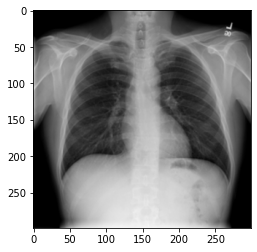

In [86]:
#Randomly choosing an image to view
sample = random.choice(df['filename'])
image = load_img(sample)
plt.imshow(image)
plt.show()

In [87]:
random.choice(df['filename'])

'/Users/soutick/Documents/2020_08_09_job_hunt/COVID_19_Radiography_image_dataset/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-1.png'

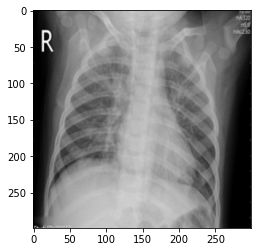

In [89]:
#See and analyze a viral pneumonia image
sample = '/Users/soutick/Documents/2020_08_09_job_hunt/COVID_19_Radiography_image_dataset/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-1.png'
image = load_img(sample)
plt.imshow(image)
plt.show()

### Let us perform image segmentation of the above image using K-means clustering
K-means is a clustering algorithm that is used to group data points into clusters such that data points lying in the same group are very similar to each other in characteristics. K-means algorithm can be used to find subgroups in the image and assign the image pixel to that subgroup which results in image segmentation.

In [19]:
import cv2
img = cv2.imread(sample)

## Preprocessing the Image

Preprocess the image by converting it to the RGB color space. Reshape it along the first axis to convert it into a 2D vector i.e. if the image is of the shape (100,100,3) (width, height, channels) then it will be converted to (10000,3). Next, convert it into the float datatype.

In [20]:
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
twoDimage = img.reshape((-1,3))
twoDimage = np.float32(twoDimage)

## Defining Parameters
Define the criteria by which the K-means algorithm is supposed to cluster pixels.

The ‘K’ variable defines the no of clusters/groups that a pixel can belong to (You can increase this value to increase the degree of segmentation).

In [21]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 2
attempts=10

## Apply K-Means
The K variable randomly initiates K different clusters and the ‘center’ variable defines the center of these clusters. The distance of each point from these centers is computed and then they are assigned to one of the clusters. Then they are divided into different segments according to the value of their ‘label variable’.

In [22]:
#K=2
ret,label,center=cv2.kmeans(twoDimage,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img.shape))

In [23]:
#K=3
ret,label,center=cv2.kmeans(twoDimage,3,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
result_image_3 = res.reshape((img.shape))

In [24]:
#K=4
ret,label,center=cv2.kmeans(twoDimage,4,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
result_image_4 = res.reshape((img.shape))

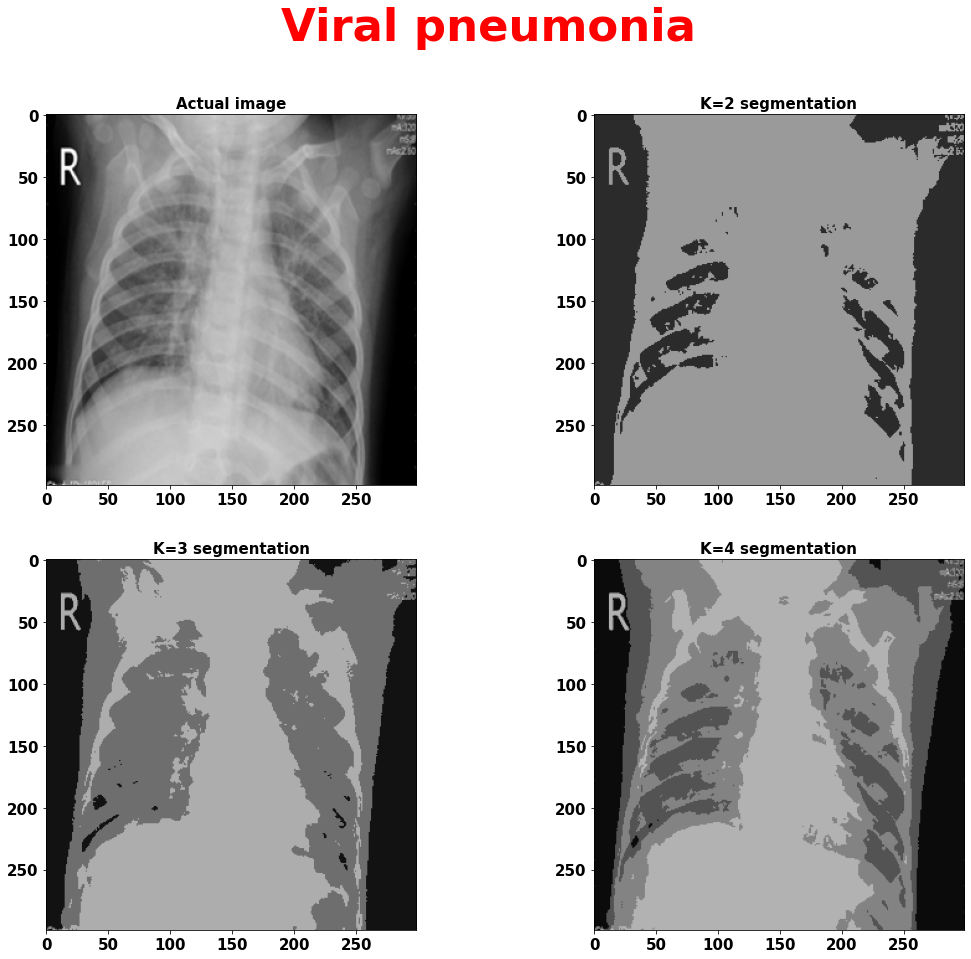

In [25]:
ts=15; #ticksize

plt.subplot(2,2,1)
plt.imshow(image)
plt.title("Actual image", fontsize=15, fontweight='bold')
plt.yticks(fontsize=ts, fontweight='bold')
plt.xticks(fontsize=ts, fontweight='bold')
plt.gcf().set_size_inches(7, 4)
#plt.show()


plt.subplot(2,2,2)
plt.imshow(result_image)
plt.title("K=2 segmentation", fontsize=15, fontweight='bold')
plt.yticks(fontsize=ts, fontweight='bold')
plt.xticks(fontsize=ts, fontweight='bold')
#plt.show()

plt.subplot(2,2,3)
plt.imshow(result_image_3)
plt.title("K=3 segmentation", fontsize=15, fontweight='bold')
plt.yticks(fontsize=ts, fontweight='bold')
plt.xticks(fontsize=ts, fontweight='bold')
#plt.show()

plt.subplot(2,2,4)
plt.imshow(result_image_4)
plt.title("K=4 segmentation", fontsize=15, fontweight='bold')
plt.yticks(fontsize=ts, fontweight='bold')
plt.xticks(fontsize=ts, fontweight='bold')


plt.gcf().set_size_inches(18, 15)
plt.suptitle("Viral pneumonia", fontsize=45, fontweight='bold', color='Red')
plt.show()

## Let us apply the same to a healthy lung

In [90]:
samplen='/Users/soutick/Documents/2020_08_09_job_hunt/COVID_19_Radiography_image_dataset/COVID-19_Radiography_Dataset/Normal/Normal-4183.png'

In [27]:
img = cv2.imread(samplen)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
twoDimage = img.reshape((-1,3))
twoDimage = np.float32(twoDimage)

In [28]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
attempts=10

In [29]:
#K=2
ret,label,center=cv2.kmeans(twoDimage,2,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img.shape))

#K=3
ret,label,center=cv2.kmeans(twoDimage,3,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
result_image_3 = res.reshape((img.shape))

#K=4
ret,label,center=cv2.kmeans(twoDimage,4,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
result_image_4 = res.reshape((img.shape))


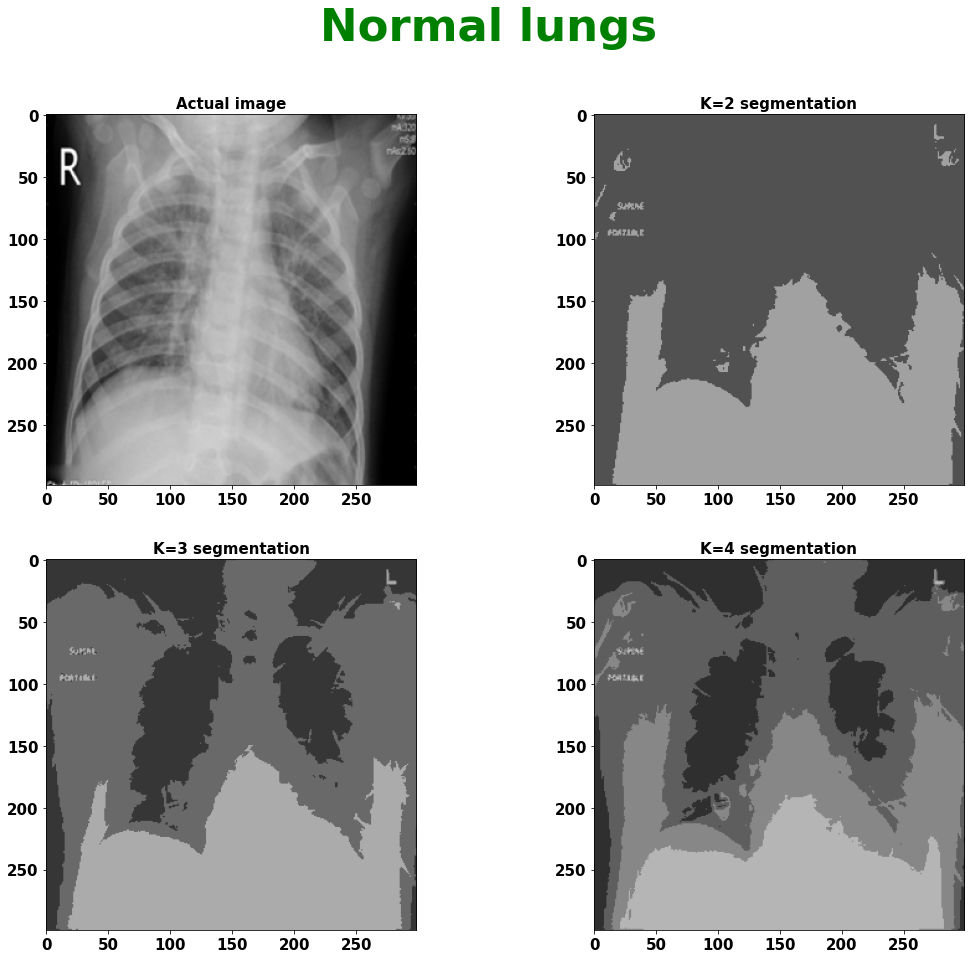

In [30]:
ts=15; #ticksize

plt.subplot(2,2,1)
plt.imshow(image)
plt.title("Actual image", fontsize=15, fontweight='bold')
plt.yticks(fontsize=ts, fontweight='bold')
plt.xticks(fontsize=ts, fontweight='bold')
plt.gcf().set_size_inches(7, 4)
#plt.show()


plt.subplot(2,2,2)
plt.imshow(result_image)
plt.title("K=2 segmentation", fontsize=15, fontweight='bold')
plt.yticks(fontsize=ts, fontweight='bold')
plt.xticks(fontsize=ts, fontweight='bold')
#plt.show()

plt.subplot(2,2,3)
plt.imshow(result_image_3)
plt.title("K=3 segmentation", fontsize=15, fontweight='bold')
plt.yticks(fontsize=ts, fontweight='bold')
plt.xticks(fontsize=ts, fontweight='bold')
#plt.show()

plt.subplot(2,2,4)
plt.imshow(result_image_4)
plt.title("K=4 segmentation", fontsize=15, fontweight='bold')
plt.yticks(fontsize=ts, fontweight='bold')
plt.xticks(fontsize=ts, fontweight='bold')


plt.gcf().set_size_inches(18, 15)
plt.suptitle("Normal lungs", fontsize=45, fontweight='bold', color='Green')
plt.show()

## So normal lungs look significantly different when passed through segmentation using K-means clustering

## Image Segmentation using Contour Detection

In [106]:
img = cv2.imread(sample)
img = cv2.resize(img,(256,256))

## Preprocessing the Image
1. Convert the image to grayscale.
2. Compute the threshold of the grayscale image(the pixels above the threshold are converted to white otherwise zero).
3. Apply canny edge detection to the thresholded image before finally using the ‘cv2.dilate’ function to dilate edges detected.

In [126]:
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
_,thresh = cv2.threshold(gray, np.mean(gray), 255, cv2.THRESH_BINARY_INV)
edges = cv2.dilate(cv2.Canny(thresh,0,255),None)

## Detecting and Drawing Contours
1. Use the OpenCV find contour function to find all the open/closed regions in the image and store (cnt). Use the -1 subscript since the function returns a two-element tuple.
2. Pass them through the sorted function to access the largest contours first.
3. Create a zero pixel mask that has equal shape and size to the original image.
4. Draw the detected contours on the created mask.

In [127]:
cnt = sorted(cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2], key=cv2.contourArea)[-1]
mask = np.zeros((256,256), np.uint8)
masked = cv2.drawContours(mask, [cnt],-1, 255, -1)

## Segmenting the Regions
In order to show only the segmented parts of the image, we perform a bitwise AND operation on the original image (img) and the mask (containing the outlines of all our detected contours).

Finally, Convert the image back to RGB to see it segmented(while being comparable to the original image).

In [128]:
dst = cv2.bitwise_and(img, img, mask=mask)
segmented = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)

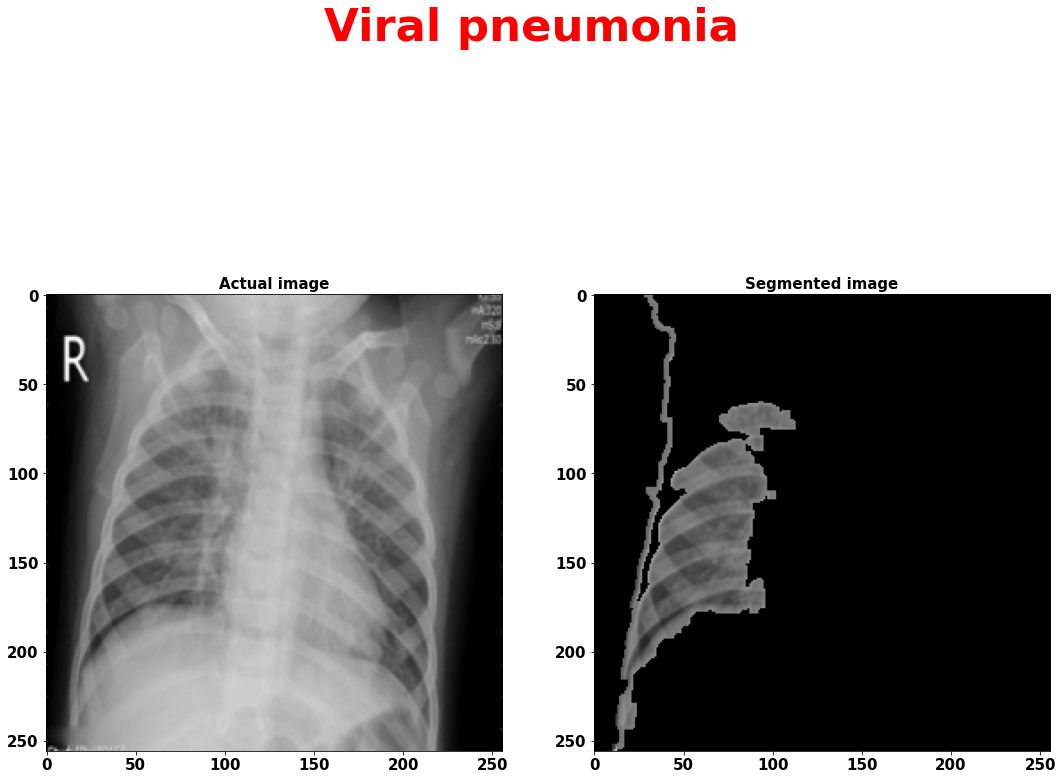

In [129]:
ts=15; #ticksize

plt.subplot(1,2,1)
plt.imshow(img)
plt.title("Actual image", fontsize=15, fontweight='bold')
plt.yticks(fontsize=ts, fontweight='bold')
plt.xticks(fontsize=ts, fontweight='bold')
plt.gcf().set_size_inches(7, 4)
#plt.show()


plt.subplot(1,2,2)
plt.imshow(segmented)
plt.title("Segmented image", fontsize=15, fontweight='bold')
plt.yticks(fontsize=ts, fontweight='bold')
plt.xticks(fontsize=ts, fontweight='bold')
#plt.show()



plt.gcf().set_size_inches(18, 15)
plt.suptitle("Viral pneumonia", fontsize=45, fontweight='bold', color='Red')
plt.show()

## Normal lungs analysis

In [36]:
img = cv2.imread(samplen)
img = cv2.resize(img,(256,256))

In [37]:
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
_,thresh = cv2.threshold(gray, np.mean(gray), 255, cv2.THRESH_BINARY_INV)
edges = cv2.dilate(cv2.Canny(thresh,0,255),None)

In [38]:
cnt = sorted(cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2], key=cv2.contourArea)[-1]
mask = np.zeros((256,256), np.uint8)
masked = cv2.drawContours(mask, [cnt],-1, 255, -1)

In [39]:
dst = cv2.bitwise_and(img, img, mask=mask)
segmented = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)

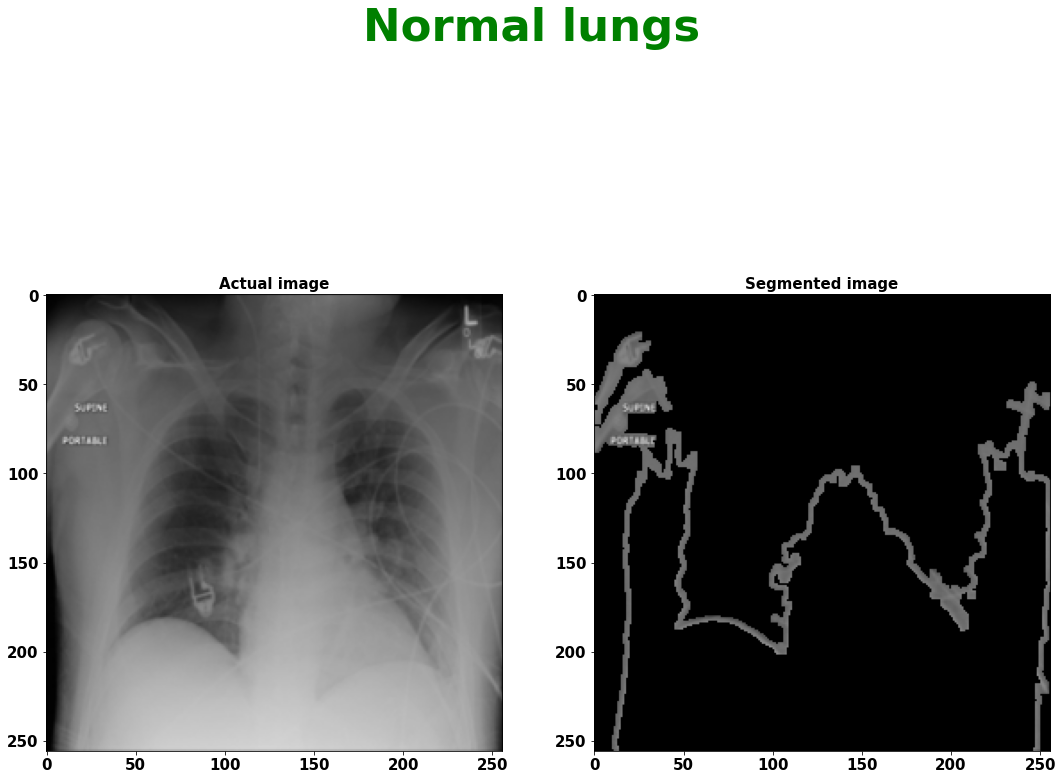

In [40]:
ts=15; #ticksize

plt.subplot(1,2,1)
plt.imshow(img)
plt.title("Actual image", fontsize=15, fontweight='bold')
plt.yticks(fontsize=ts, fontweight='bold')
plt.xticks(fontsize=ts, fontweight='bold')
plt.gcf().set_size_inches(7, 4)
#plt.show()


plt.subplot(1,2,2)
plt.imshow(segmented)
plt.title("Segmented image", fontsize=15, fontweight='bold')
plt.yticks(fontsize=ts, fontweight='bold')
plt.xticks(fontsize=ts, fontweight='bold')
#plt.show()



plt.gcf().set_size_inches(18, 15)
plt.suptitle("Normal lungs", fontsize=45, fontweight='bold', color='Green')
plt.show()

# Image Segmentation using Thresholding

In [41]:
img = cv2.imread(sample)

In [42]:
img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_gray=cv2.cvtColor(img_rgb,cv2.COLOR_RGB2GRAY)

## Segmentation Process
Create a “filter_image” function that multiplies the mask (created in the previous section) with the RGB channels of our image. Further, they are concatenated to form a normal image.

Next, we calculate the threshold (thresh) for the gray image and use it as a deciding factor i.e. values lying below this threshold are selected and others are discarded. This creates a mask-like (img_otsu) image that can later be used to segment our original image.

Finally, apply the “filter_image” function on the original image(img) and the mask formed using thresholding (img_otsu)

In [43]:
from skimage.filters import threshold_otsu
def filter_image(image, mask):
    r = image[:,:,0] * mask
    g = image[:,:,1] * mask
    b = image[:,:,2] * mask
    return np.dstack([r,g,b])

thresh = threshold_otsu(img_gray)
img_otsu  = img_gray < thresh
filtered = filter_image(img, img_otsu)

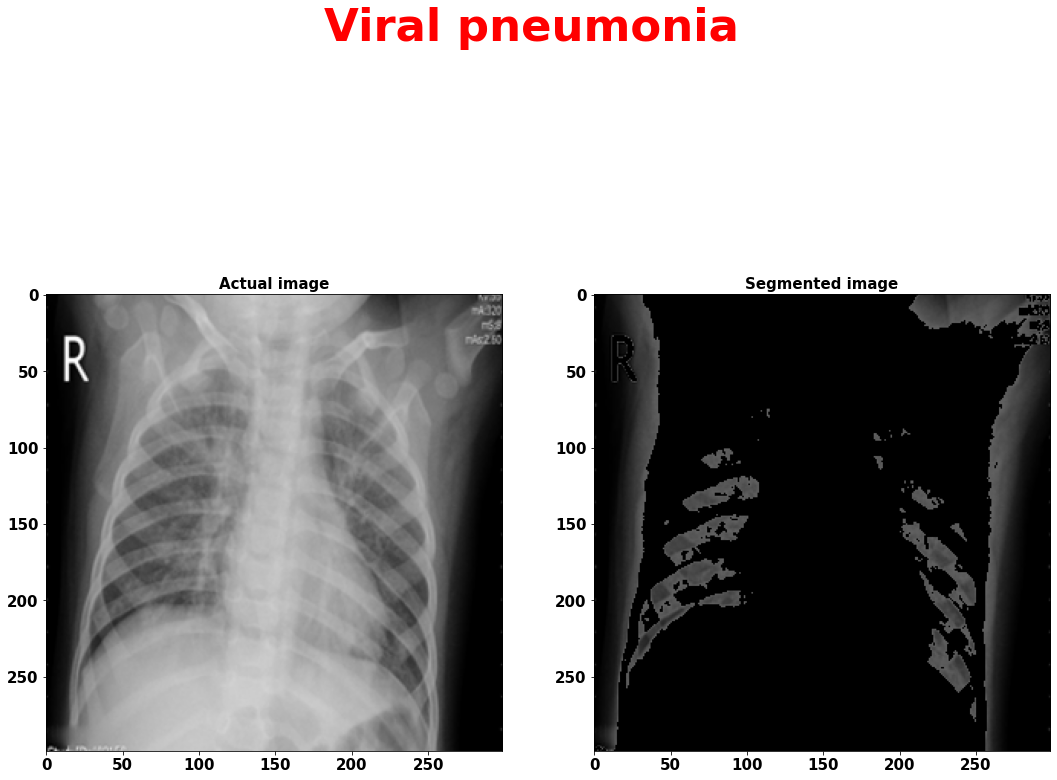

In [44]:
ts=15; #ticksize

plt.subplot(1,2,1)
plt.imshow(img)
plt.title("Actual image", fontsize=15, fontweight='bold')
plt.yticks(fontsize=ts, fontweight='bold')
plt.xticks(fontsize=ts, fontweight='bold')
plt.gcf().set_size_inches(7, 4)
#plt.show()


plt.subplot(1,2,2)
plt.imshow(filtered)
plt.title("Segmented image", fontsize=15, fontweight='bold')
plt.yticks(fontsize=ts, fontweight='bold')
plt.xticks(fontsize=ts, fontweight='bold')
#plt.show()



plt.gcf().set_size_inches(18, 15)
plt.suptitle("Viral pneumonia", fontsize=45, fontweight='bold', color='Red')
plt.show()

## Normal lungs

In [45]:
img = cv2.imread(samplen)
img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_gray=cv2.cvtColor(img_rgb,cv2.COLOR_RGB2GRAY)

In [46]:
def filter_image(image, mask):
    r = image[:,:,0] * mask
    g = image[:,:,1] * mask
    b = image[:,:,2] * mask
    return np.dstack([r,g,b])

thresh = threshold_otsu(img_gray)
img_otsu  = img_gray < thresh
filtered = filter_image(img, img_otsu)

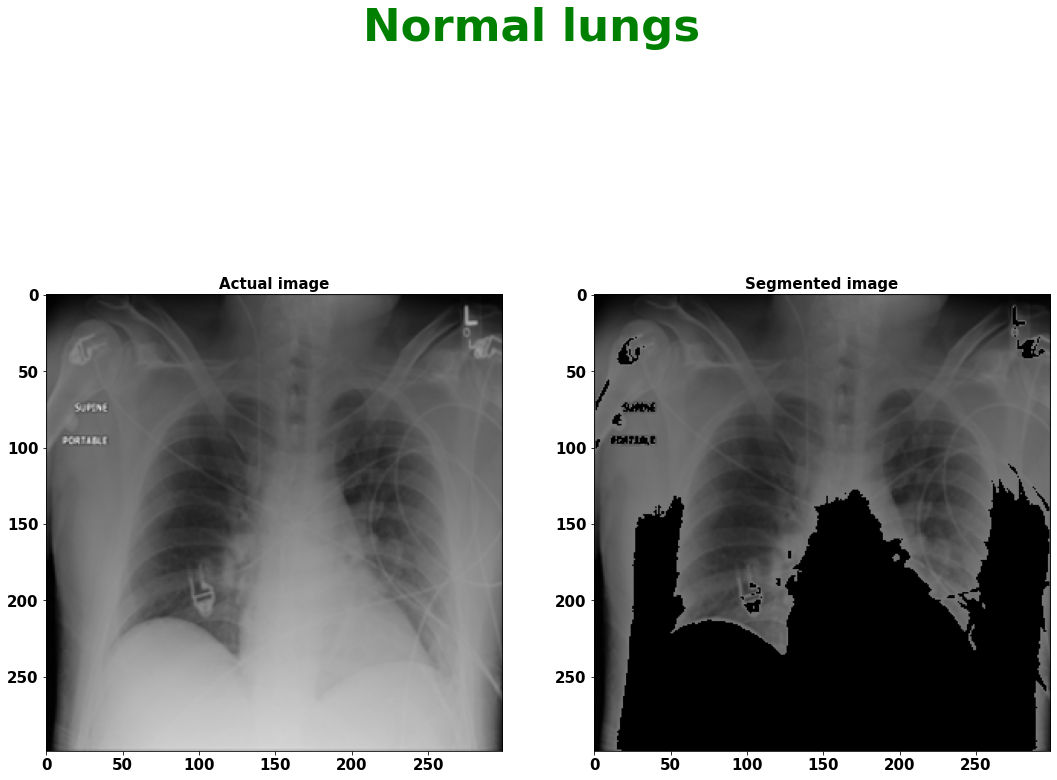

In [47]:
ts=15; #ticksize

plt.subplot(1,2,1)
plt.imshow(img)
plt.title("Actual image", fontsize=15, fontweight='bold')
plt.yticks(fontsize=ts, fontweight='bold')
plt.xticks(fontsize=ts, fontweight='bold')
plt.gcf().set_size_inches(7, 4)
#plt.show()


plt.subplot(1,2,2)
plt.imshow(filtered)
plt.title("Segmented image", fontsize=15, fontweight='bold')
plt.yticks(fontsize=ts, fontweight='bold')
plt.xticks(fontsize=ts, fontweight='bold')
#plt.show()



plt.gcf().set_size_inches(18, 15)
plt.suptitle("Normal lungs", fontsize=45, fontweight='bold', color='Green')
plt.show()

# Segmentation using Color Masking


## Viral pneumonia

In [48]:
img = cv2.imread(sample)
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

## Define the Color Range to be Detected
Define the RGB range for the color we want to detect. Use the OpenCV in range function to create a mask of all the pixels that fall within the range that we defined. It will later help to mask these pixels.

### Marking only takes color between two mentioned colors

In [49]:
frac=0.5; #how close the 2nd color is to white
black = (0, 0, 0)
grey = (frac*255, frac*255, frac*255)
mask = cv2.inRange(img, black, grey)

## Apply the mask

In [50]:
result = cv2.bitwise_and(img, img, mask=mask)

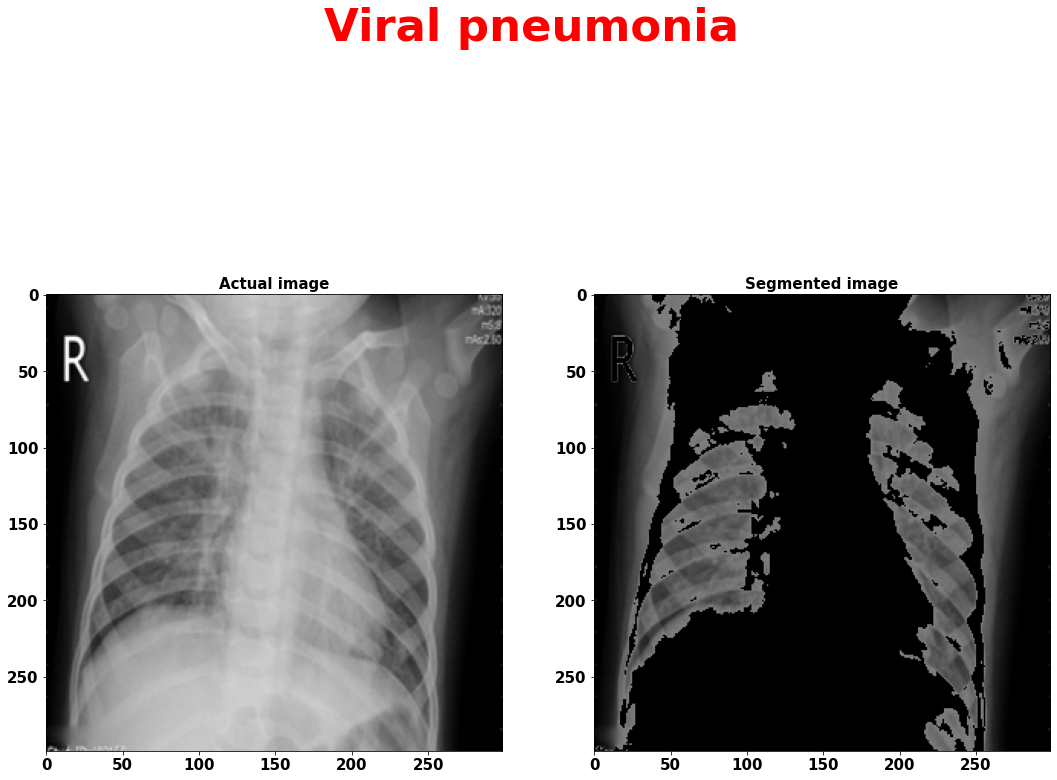

In [51]:
ts=15; #ticksize

plt.subplot(1,2,1)
plt.imshow(img)
plt.title("Actual image", fontsize=15, fontweight='bold')
plt.yticks(fontsize=ts, fontweight='bold')
plt.xticks(fontsize=ts, fontweight='bold')
plt.gcf().set_size_inches(7, 4)
#plt.show()


plt.subplot(1,2,2)
plt.imshow(result)
plt.title("Segmented image", fontsize=15, fontweight='bold')
plt.yticks(fontsize=ts, fontweight='bold')
plt.xticks(fontsize=ts, fontweight='bold')
#plt.show()



plt.gcf().set_size_inches(18, 15)
plt.suptitle("Viral pneumonia", fontsize=45, fontweight='bold', color='Red')
plt.show()

## Normal Lungs

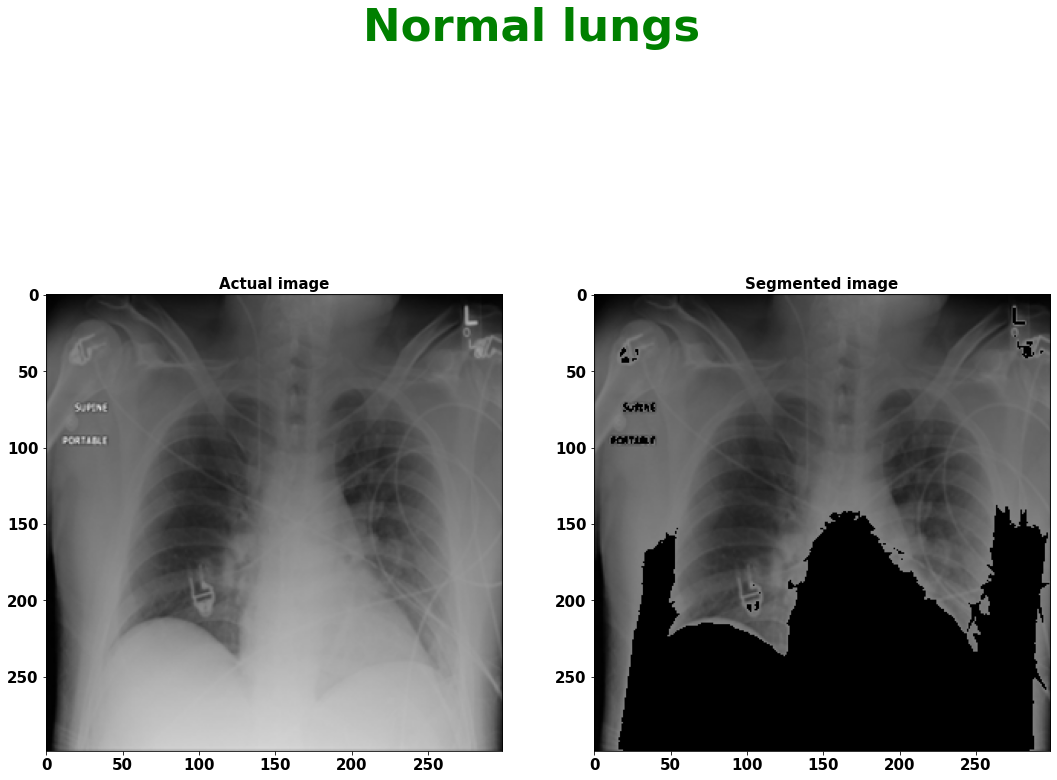

In [52]:
img = cv2.imread(samplen)
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
frac=0.5; #how close the 2nd color is to white
black = (0, 0, 0)
grey = (frac*255, frac*255, frac*255)
mask = cv2.inRange(img, black, grey)
result = cv2.bitwise_and(img, img, mask=mask)

ts=15; #ticksize

plt.subplot(1,2,1)
plt.imshow(img)
plt.title("Actual image", fontsize=15, fontweight='bold')
plt.yticks(fontsize=ts, fontweight='bold')
plt.xticks(fontsize=ts, fontweight='bold')
plt.gcf().set_size_inches(7, 4)
#plt.show()


plt.subplot(1,2,2)
plt.imshow(result)
plt.title("Segmented image", fontsize=15, fontweight='bold')
plt.yticks(fontsize=ts, fontweight='bold')
plt.xticks(fontsize=ts, fontweight='bold')
#plt.show()



plt.gcf().set_size_inches(18, 15)
plt.suptitle("Normal lungs", fontsize=45, fontweight='bold', color='Green')
plt.show()

## Let us do color analysis of images

## Viral penumonia lungs

In [53]:
img = cv2.imread(sample)
b,g,r = (img[200, 200])
print (r)
print (g)
print (b)
#Knowing image shape
print("Total image pixels="+str(img.shape))
print("Total image pixels X= "+str(img.shape[0]))
print("Total image pixels X= "+str(img.shape[1]))

162
162
162
Total image pixels=(299, 299, 3)
Total image pixels X= 299
Total image pixels X= 299


In [54]:
#average value of r,g,b
bavg=0;
gavg=0;
ravg=0;
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        b,g,r = (img[i, j])
        bavg+=b/(img.shape[0]*img.shape[1])
        gavg+=g/(img.shape[0]*img.shape[1])
        ravg+=r/(img.shape[0]*img.shape[1])
        

In [55]:
print(bavg)
print(gavg)
print(ravg)

121.50180646749205
121.50180646749205
121.50180646749205


BGR for Normal lungs
111.66736389973178
111.66736389973178
111.66736389973178


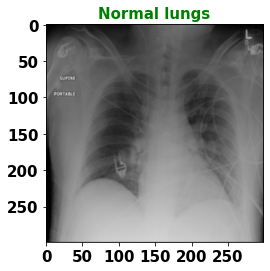

In [56]:
img = cv2.imread(samplen)

plt.imshow(img)
plt.title("Normal lungs", fontsize=15, fontweight='bold', color='Green')
plt.yticks(fontsize=ts, fontweight='bold')
plt.xticks(fontsize=ts, fontweight='bold')
plt.gcf().set_size_inches(7, 4)
#average value of r,g,b
bavg=0;
gavg=0;
ravg=0;
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        b,g,r = (img[i, j])
        bavg+=b/(img.shape[0]*img.shape[1])
        gavg+=g/(img.shape[0]*img.shape[1])
        ravg+=r/(img.shape[0]*img.shape[1])
print("BGR for Normal lungs")
print(bavg)
print(gavg)
print(ravg)

BGR for Viral penumonia
121.50180646749205
121.50180646749205
121.50180646749205


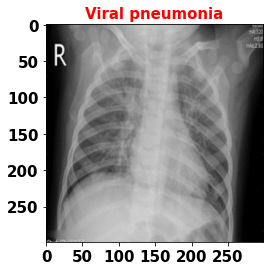

In [57]:
img = cv2.imread(sample)

plt.imshow(img)
plt.title("Viral pneumonia", fontsize=15, fontweight='bold', color='Red')
plt.yticks(fontsize=ts, fontweight='bold')
plt.xticks(fontsize=ts, fontweight='bold')
plt.gcf().set_size_inches(7, 4)
#average value of r,g,b
bavg=0;
gavg=0;
ravg=0;
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        b,g,r = (img[i, j])
        bavg+=b/(img.shape[0]*img.shape[1])
        gavg+=g/(img.shape[0]*img.shape[1])
        ravg+=r/(img.shape[0]*img.shape[1])
print("BGR for Viral penumonia")
print(bavg)
print(gavg)
print(ravg)

In [58]:
len(df['filename'])

2690

In [59]:
#Extracting filenames and scores for a paricular image
print(df['filename'][2689])
print(df['category'][2689])

/Users/soutick/Documents/2020_08_09_job_hunt/COVID_19_Radiography_image_dataset/COVID-19_Radiography_Dataset/Normal/Normal-5390.png
0


In [60]:
print(df['filename'][0])
print(df['category'][0])

/Users/soutick/Documents/2020_08_09_job_hunt/COVID_19_Radiography_image_dataset/COVID-19_Radiography_Dataset/Viral Pneumonia/Viral Pneumonia-770.png
1


## The function below returns the average b,g,r pixel for an image before segmentation

In [95]:
def calculate_bgr(filename):
    img = cv2.imread(filename)
    bavg=0;
    gavg=0;
    ravg=0;
    bgrlist=[];
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            b,g,r = (img[i, j])
            bavg+=b/(img.shape[0]*img.shape[1])
            gavg+=g/(img.shape[0]*img.shape[1])
            ravg+=r/(img.shape[0]*img.shape[1])
    bgrlist.append(bavg)
    bgrlist.append(gavg)
    bgrlist.append(ravg)
    return bgrlist

In [62]:
calculate_bgr(samplen)

[111.66736389973178, 111.66736389973178, 111.66736389973178]

In [68]:
#Lists for RGB values for viral penumonia images
blistviral=[];
glistviral=[];
rlistviral=[];

#Lists for RGB values for normal images
blistnormal=[];
glistnormal=[];
rlistnormal=[];

for k in range(len(df['filename'])):
    print("progress = "+str(round(k*100/len(df['filename']),2))+'%')
    if df['category'][k]=='1':
        print("viral")
        vlist=calculate_bgr(df['filename'][k])
        blistviral.append(vlist[0])
        glistviral.append(vlist[1])
        rlistviral.append(vlist[2])
    else:
        print("normal")
        nlist=calculate_bgr(df['filename'][k])
        blistnormal.append(nlist[0])
        glistnormal.append(nlist[1])
        rlistnormal.append(nlist[2])

progress = 0.0%
viral
progress = 0.04%
viral
progress = 0.07%
viral
progress = 0.11%
viral
progress = 0.15%
viral
progress = 0.19%
viral
progress = 0.22%
viral
progress = 0.26%
viral
progress = 0.3%
viral
progress = 0.33%
viral
progress = 0.37%
viral
progress = 0.41%
viral
progress = 0.45%
viral
progress = 0.48%
viral
progress = 0.52%
viral
progress = 0.56%
viral
progress = 0.59%
viral
progress = 0.63%
viral
progress = 0.67%
viral
progress = 0.71%
viral
progress = 0.74%
viral
progress = 0.78%
viral
progress = 0.82%
viral
progress = 0.86%
viral
progress = 0.89%
viral
progress = 0.93%
viral
progress = 0.97%
viral
progress = 1.0%
viral
progress = 1.04%
viral
progress = 1.08%
viral
progress = 1.12%
viral
progress = 1.15%
viral
progress = 1.19%
viral
progress = 1.23%
viral
progress = 1.26%
viral
progress = 1.3%
viral
progress = 1.34%
viral
progress = 1.38%
viral
progress = 1.41%
viral
progress = 1.45%
viral
progress = 1.49%
viral
progress = 1.52%
viral
progress = 1.56%
viral
progress = 1.6%

progress = 13.2%
viral
progress = 13.23%
viral
progress = 13.27%
viral
progress = 13.31%
viral
progress = 13.35%
viral
progress = 13.38%
viral
progress = 13.42%
viral
progress = 13.46%
viral
progress = 13.49%
viral
progress = 13.53%
viral
progress = 13.57%
viral
progress = 13.61%
viral
progress = 13.64%
viral
progress = 13.68%
viral
progress = 13.72%
viral
progress = 13.75%
viral
progress = 13.79%
viral
progress = 13.83%
viral
progress = 13.87%
viral
progress = 13.9%
viral
progress = 13.94%
viral
progress = 13.98%
viral
progress = 14.01%
viral
progress = 14.05%
viral
progress = 14.09%
viral
progress = 14.13%
viral
progress = 14.16%
viral
progress = 14.2%
viral
progress = 14.24%
viral
progress = 14.28%
viral
progress = 14.31%
viral
progress = 14.35%
viral
progress = 14.39%
viral
progress = 14.42%
viral
progress = 14.46%
viral
progress = 14.5%
viral
progress = 14.54%
viral
progress = 14.57%
viral
progress = 14.61%
viral
progress = 14.65%
viral
progress = 14.68%
viral
progress = 14.72%
vi

progress = 25.95%
viral
progress = 25.99%
viral
progress = 26.02%
viral
progress = 26.06%
viral
progress = 26.1%
viral
progress = 26.13%
viral
progress = 26.17%
viral
progress = 26.21%
viral
progress = 26.25%
viral
progress = 26.28%
viral
progress = 26.32%
viral
progress = 26.36%
viral
progress = 26.39%
viral
progress = 26.43%
viral
progress = 26.47%
viral
progress = 26.51%
viral
progress = 26.54%
viral
progress = 26.58%
viral
progress = 26.62%
viral
progress = 26.65%
viral
progress = 26.69%
viral
progress = 26.73%
viral
progress = 26.77%
viral
progress = 26.8%
viral
progress = 26.84%
viral
progress = 26.88%
viral
progress = 26.91%
viral
progress = 26.95%
viral
progress = 26.99%
viral
progress = 27.03%
viral
progress = 27.06%
viral
progress = 27.1%
viral
progress = 27.14%
viral
progress = 27.17%
viral
progress = 27.21%
viral
progress = 27.25%
viral
progress = 27.29%
viral
progress = 27.32%
viral
progress = 27.36%
viral
progress = 27.4%
viral
progress = 27.43%
viral
progress = 27.47%
vi

progress = 38.7%
viral
progress = 38.74%
viral
progress = 38.77%
viral
progress = 38.81%
viral
progress = 38.85%
viral
progress = 38.88%
viral
progress = 38.92%
viral
progress = 38.96%
viral
progress = 39.0%
viral
progress = 39.03%
viral
progress = 39.07%
viral
progress = 39.11%
viral
progress = 39.14%
viral
progress = 39.18%
viral
progress = 39.22%
viral
progress = 39.26%
viral
progress = 39.29%
viral
progress = 39.33%
viral
progress = 39.37%
viral
progress = 39.41%
viral
progress = 39.44%
viral
progress = 39.48%
viral
progress = 39.52%
viral
progress = 39.55%
viral
progress = 39.59%
viral
progress = 39.63%
viral
progress = 39.67%
viral
progress = 39.7%
viral
progress = 39.74%
viral
progress = 39.78%
viral
progress = 39.81%
viral
progress = 39.85%
viral
progress = 39.89%
viral
progress = 39.93%
viral
progress = 39.96%
viral
progress = 40.0%
viral
progress = 40.04%
viral
progress = 40.07%
viral
progress = 40.11%
viral
progress = 40.15%
viral
progress = 40.19%
viral
progress = 40.22%
vi

progress = 51.41%
normal
progress = 51.45%
normal
progress = 51.49%
normal
progress = 51.52%
normal
progress = 51.56%
normal
progress = 51.6%
normal
progress = 51.64%
normal
progress = 51.67%
normal
progress = 51.71%
normal
progress = 51.75%
normal
progress = 51.78%
normal
progress = 51.82%
normal
progress = 51.86%
normal
progress = 51.9%
normal
progress = 51.93%
normal
progress = 51.97%
normal
progress = 52.01%
normal
progress = 52.04%
normal
progress = 52.08%
normal
progress = 52.12%
normal
progress = 52.16%
normal
progress = 52.19%
normal
progress = 52.23%
normal
progress = 52.27%
normal
progress = 52.3%
normal
progress = 52.34%
normal
progress = 52.38%
normal
progress = 52.42%
normal
progress = 52.45%
normal
progress = 52.49%
normal
progress = 52.53%
normal
progress = 52.57%
normal
progress = 52.6%
normal
progress = 52.64%
normal
progress = 52.68%
normal
progress = 52.71%
normal
progress = 52.75%
normal
progress = 52.79%
normal
progress = 52.83%
normal
progress = 52.86%
normal
prog

progress = 63.68%
normal
progress = 63.72%
normal
progress = 63.75%
normal
progress = 63.79%
normal
progress = 63.83%
normal
progress = 63.87%
normal
progress = 63.9%
normal
progress = 63.94%
normal
progress = 63.98%
normal
progress = 64.01%
normal
progress = 64.05%
normal
progress = 64.09%
normal
progress = 64.13%
normal
progress = 64.16%
normal
progress = 64.2%
normal
progress = 64.24%
normal
progress = 64.28%
normal
progress = 64.31%
normal
progress = 64.35%
normal
progress = 64.39%
normal
progress = 64.42%
normal
progress = 64.46%
normal
progress = 64.5%
normal
progress = 64.54%
normal
progress = 64.57%
normal
progress = 64.61%
normal
progress = 64.65%
normal
progress = 64.68%
normal
progress = 64.72%
normal
progress = 64.76%
normal
progress = 64.8%
normal
progress = 64.83%
normal
progress = 64.87%
normal
progress = 64.91%
normal
progress = 64.94%
normal
progress = 64.98%
normal
progress = 65.02%
normal
progress = 65.06%
normal
progress = 65.09%
normal
progress = 65.13%
normal
prog

progress = 75.95%
normal
progress = 75.99%
normal
progress = 76.02%
normal
progress = 76.06%
normal
progress = 76.1%
normal
progress = 76.13%
normal
progress = 76.17%
normal
progress = 76.21%
normal
progress = 76.25%
normal
progress = 76.28%
normal
progress = 76.32%
normal
progress = 76.36%
normal
progress = 76.39%
normal
progress = 76.43%
normal
progress = 76.47%
normal
progress = 76.51%
normal
progress = 76.54%
normal
progress = 76.58%
normal
progress = 76.62%
normal
progress = 76.65%
normal
progress = 76.69%
normal
progress = 76.73%
normal
progress = 76.77%
normal
progress = 76.8%
normal
progress = 76.84%
normal
progress = 76.88%
normal
progress = 76.91%
normal
progress = 76.95%
normal
progress = 76.99%
normal
progress = 77.03%
normal
progress = 77.06%
normal
progress = 77.1%
normal
progress = 77.14%
normal
progress = 77.17%
normal
progress = 77.21%
normal
progress = 77.25%
normal
progress = 77.29%
normal
progress = 77.32%
normal
progress = 77.36%
normal
progress = 77.4%
normal
prog

progress = 88.22%
normal
progress = 88.25%
normal
progress = 88.29%
normal
progress = 88.33%
normal
progress = 88.36%
normal
progress = 88.4%
normal
progress = 88.44%
normal
progress = 88.48%
normal
progress = 88.51%
normal
progress = 88.55%
normal
progress = 88.59%
normal
progress = 88.62%
normal
progress = 88.66%
normal
progress = 88.7%
normal
progress = 88.74%
normal
progress = 88.77%
normal
progress = 88.81%
normal
progress = 88.85%
normal
progress = 88.88%
normal
progress = 88.92%
normal
progress = 88.96%
normal
progress = 89.0%
normal
progress = 89.03%
normal
progress = 89.07%
normal
progress = 89.11%
normal
progress = 89.14%
normal
progress = 89.18%
normal
progress = 89.22%
normal
progress = 89.26%
normal
progress = 89.29%
normal
progress = 89.33%
normal
progress = 89.37%
normal
progress = 89.41%
normal
progress = 89.44%
normal
progress = 89.48%
normal
progress = 89.52%
normal
progress = 89.55%
normal
progress = 89.59%
normal
progress = 89.63%
normal
progress = 89.67%
normal
pro

In [66]:
type(df['category'][0])

str

## Let us save all the analysed data for real images in CSV files for analysis later

In [71]:
# importing pandas as pd  
#import pandas as pd  
  
     
# list of name, degree, score 
#blue_norm = blistnormal 
#green_norm = glistnormal
#red_norm = rlistnormal
     
# dictionary of lists  
#dict = {'B': blue_norm, 'G': green_norm, 'R': red_norm}  
       
#dff = pd.DataFrame(dict) 
    
# saving the dataframe 
#dff.to_csv('Normal_real_image_BGR.csv') 

In [72]:
# importing pandas as pd  
#import pandas as pd  
  
     
# list of name, degree, score 
#blue_norm = blistviral 
#green_norm = glistviral
#red_norm = rlistviral
     
# dictionary of lists  
#dict = {'B': blue_norm, 'G': green_norm, 'R': red_norm}  
       
#dfv = pd.DataFrame(dict) 
    
# saving the dataframe 
#dfv.to_csv('Viral_real_image_BGR.csv')

## Let us visualize our results. 
We first write a function that converts a csv file to a list

In [144]:
def extract_list_from_CSV(filename,column_no):
    import csv
  

  
    # initializing the titles and rows list
    fields = []
    rows = []
  
    # reading csv file
    with open(filename, 'r') as csvfile:
        # creating a csv reader object
        csvreader = csv.reader(csvfile)
      
        # extracting field names through first row
        fields = next(csvreader)
  
        # extracting each data row one by one
        for row in csvreader:
            rows.append(row)
    
    plot_norm_list=[]
    for i in range(len(rows)):
        plot_norm_list.append(float(rows[i][column_no]))
    return plot_norm_list

## Let us see how much overlap is there between normal vs pneumonia lung images 

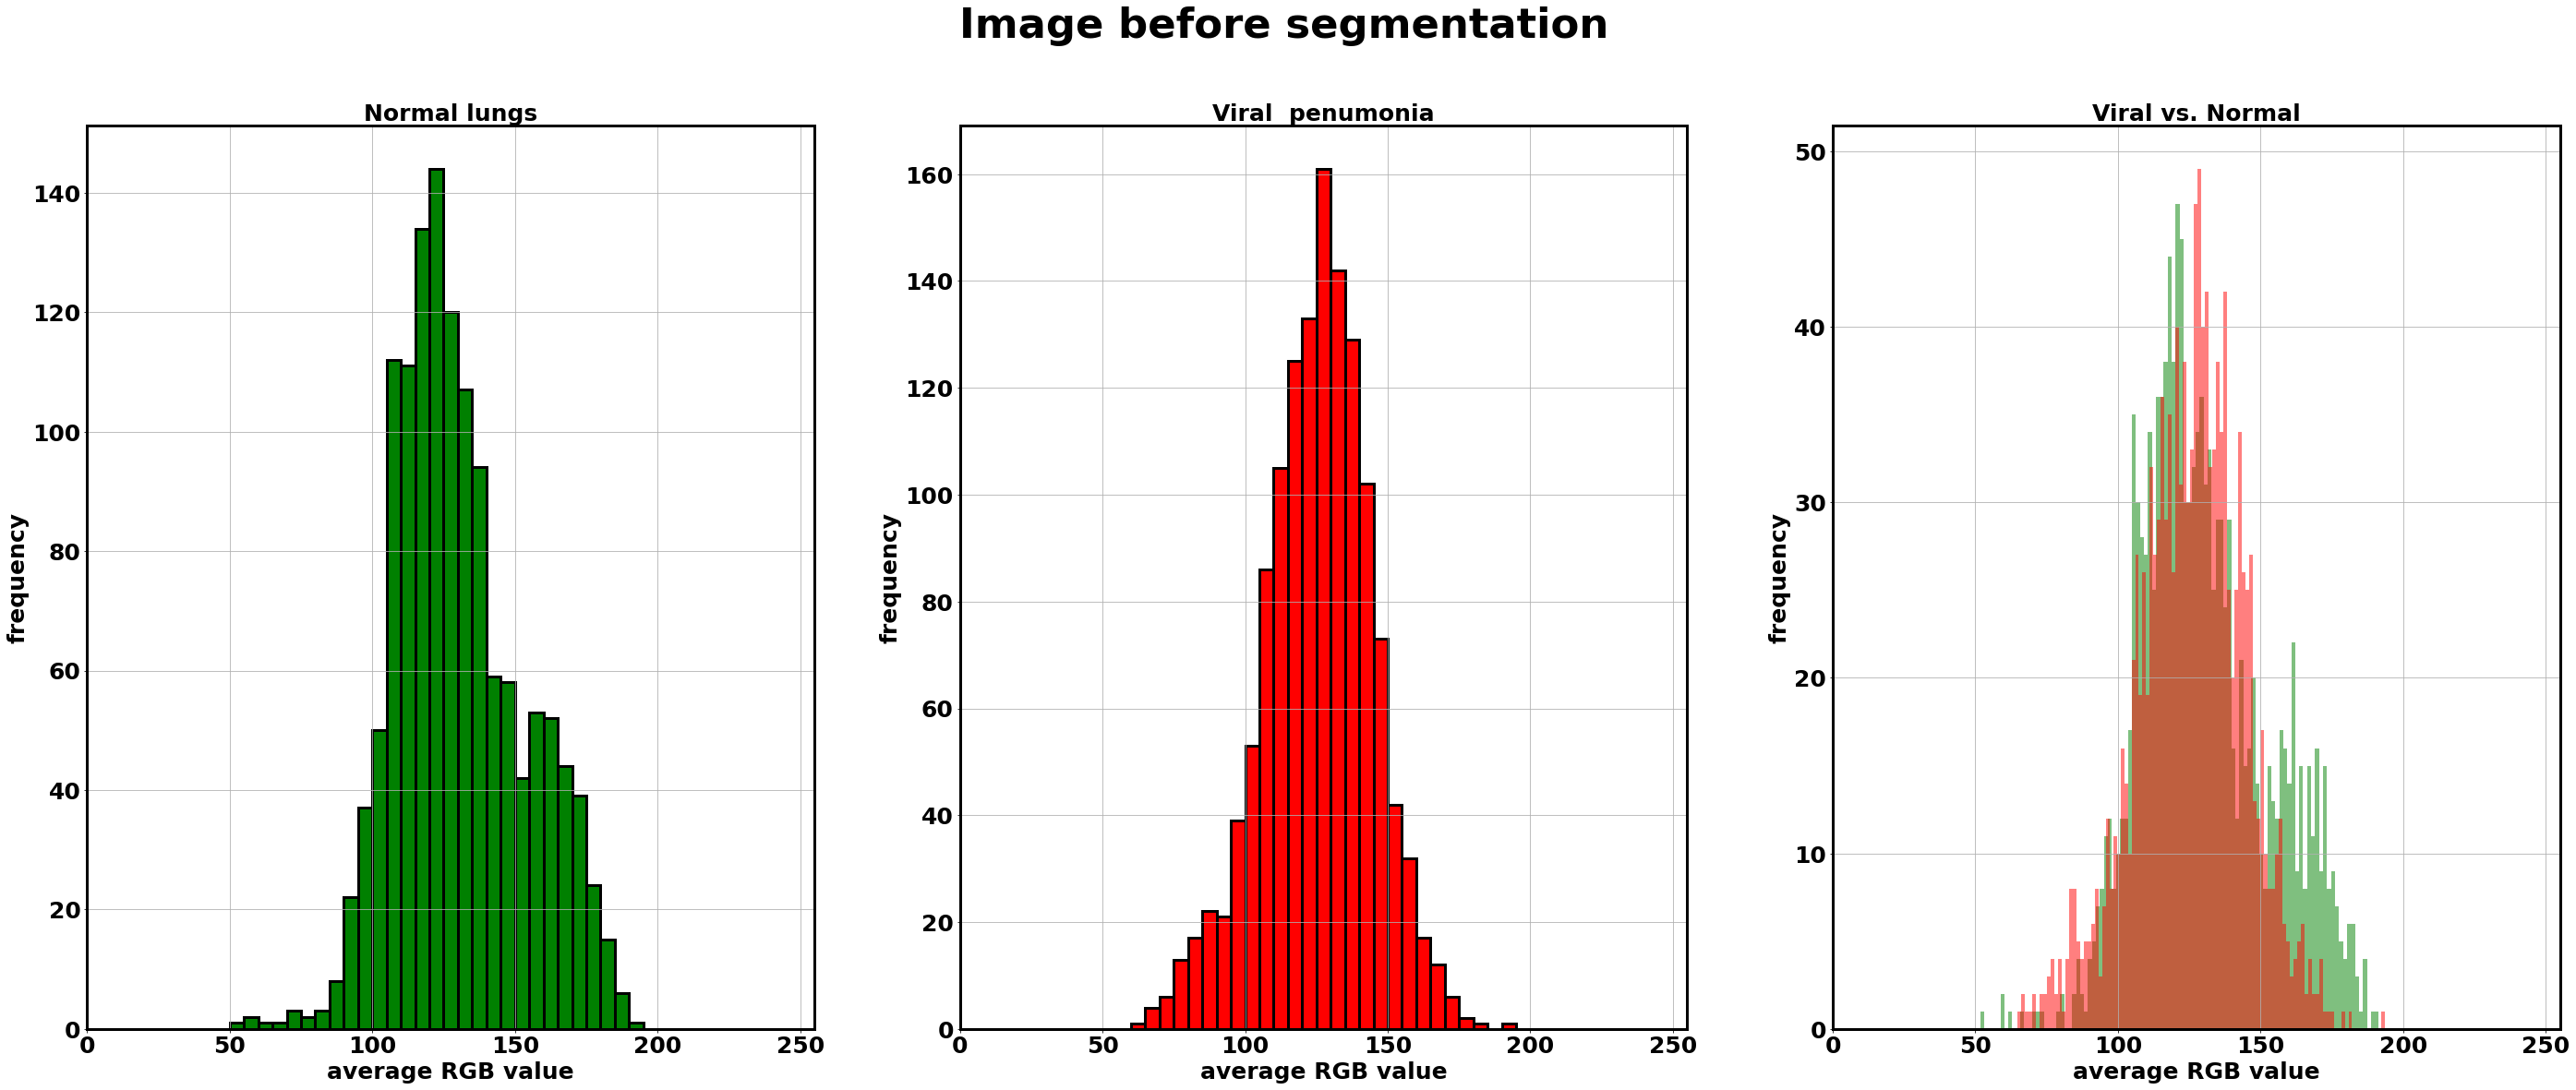

In [147]:
fs=25

plt.subplot(1,3,1)
plt.grid()
plt.hist(extract_list_from_CSV('Normal_real_image_BGR.csv',1),np.arange(0, 260, 5),facecolor='g',edgecolor='k',linewidth=3)
plt.xlabel("average RGB value", fontsize=fs, fontweight='bold')
plt.ylabel("frequency", fontsize=fs, fontweight='bold')
plt.title("Normal lungs", fontsize=fs, fontweight='bold')
plt.xlim([0,255])
#plt.xticks([0, 1.2e5, 2.4e5,3.6e5,4.8e5], ['0', '2', '4', '6', '8'],fontsize=fs, fontweight='bold')
plt.yticks(fontsize=fs, fontweight='bold')
plt.xticks(fontsize=fs, fontweight='bold')
ax = plt.gca()
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3)

plt.subplot(1,3,2)
plt.grid()
plt.hist(extract_list_from_CSV('Viral_real_image_BGR.csv',1),np.arange(0, 260, 5),facecolor='r',edgecolor='k',linewidth=3)
plt.xlabel("average RGB value", fontsize=fs, fontweight='bold')
plt.ylabel("frequency", fontsize=fs, fontweight='bold')
plt.title("Viral  penumonia", fontsize=fs, fontweight='bold')
plt.xlim([0,255])
#plt.xticks([0, 1.2e5, 2.4e5,3.6e5,4.8e5], ['0', '2', '4', '6', '8'],fontsize=fs, fontweight='bold')
plt.yticks(fontsize=fs, fontweight='bold')
plt.xticks(fontsize=fs, fontweight='bold')
ax = plt.gca()
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3)

plt.subplot(1,3,3)
plt.grid()
plt.hist(extract_list_from_CSV('Normal_real_image_BGR.csv',1), 100, alpha=0.5, facecolor='g',label='Viral')
plt.hist(extract_list_from_CSV('Viral_real_image_BGR.csv',1), 100, alpha=0.5, facecolor='r',label='Normal')
plt.xlabel("average RGB value", fontsize=fs, fontweight='bold')
plt.ylabel("frequency", fontsize=fs, fontweight='bold')
plt.title("Viral vs. Normal", fontsize=fs, fontweight='bold')
plt.xlim([0,255])
#plt.xticks([0, 1.2e5, 2.4e5,3.6e5,4.8e5], ['0', '2', '4', '6', '8'],fontsize=fs, fontweight='bold')
plt.yticks(fontsize=fs, fontweight='bold')
plt.xticks(fontsize=fs, fontweight='bold')
ax = plt.gca()
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3)

plt.gcf().set_size_inches(48, 18)
plt.suptitle("Image before segmentation", fontsize=45, fontweight='bold', color='Black')
plt.show()

### It seems like with just image without segmentation it is very difficult to distinguish between normal and viral pneumonia lungs. Let us quatify the overlap between red and green distributions

In [183]:
from scipy.stats import ttest_ind
from scipy.stats import ks_2samp
arr1=extract_list_from_CSV('Normal_real_image_BGR.csv',1);
arr2=extract_list_from_CSV('Viral_real_image_BGR.csv',1);

#arr1=[-1,0,1,2,3,4,5,6,7,8,9,10]
#arr2=[1,2,3,4]
print(ttest_ind(arr1,arr2))
print(ks_2samp(arr1, arr2))
print(np.mean(arr1),np.std(arr1))
print(np.mean(arr2),np.std(arr2))

Ttest_indResult(statistic=6.11763423619061, pvalue=1.0880110664386715e-09)
KstestResult(statistic=0.13011152416356878, pvalue=2.4432594079182033e-10)
130.2998046436206 22.64674429573472
125.36963032232407 18.973916778602405


#### So, the pvalue is very small, which says the two distributions for viral pneumonia and normal lungs are different. But the actual image shows significant overlap. So, this probably cannot be used to differentiate the two types of images. Let us check other segmentation types.

## This function calculates the average b,g,r values after perfoming segmentation using K-means clustering over an image

In [91]:
#k_means is how many clusters we want
def calculate_bgr_segmented_kmeans(filename,k_means):
    img = cv2.imread(filename)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    twoDimage = img.reshape((-1,3))
    twoDimage = np.float32(twoDimage)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    attempts=10
    ret,label,center=cv2.kmeans(twoDimage,k_means,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)
    center = np.uint8(center)
    res = center[label.flatten()]
    result_image = res.reshape((img.shape))
    
    bavg=0;
    gavg=0;
    ravg=0;
    bgrlist=[];
    for i in range(result_image.shape[0]):
        for j in range(result_image.shape[1]):
            b,g,r = (result_image[i, j])
            bavg+=b/(result_image.shape[0]*result_image.shape[1])
            gavg+=g/(result_image.shape[0]*result_image.shape[1])
            ravg+=r/(result_image.shape[0]*result_image.shape[1])
    bgrlist.append(bavg)
    bgrlist.append(gavg)
    bgrlist.append(ravg)
    return bgrlist

## Calculating average bgr in segmented images due to k-means clustering

In [99]:
k_means=4;

#Lists for RGB values for viral penumonia images
blistviral=[];
glistviral=[];
rlistviral=[];

#Lists for RGB values for normal images
blistnormal=[];
glistnormal=[];
rlistnormal=[];

for k in range(len(df['filename'])):
    print("progress = "+str(round(k*100/len(df['filename']),2))+'%')
    if df['category'][k]=='1':
        print("viral")
        vlist=calculate_bgr_segmented_kmeans(df['filename'][k],k_means)
        blistviral.append(vlist[0])
        glistviral.append(vlist[1])
        rlistviral.append(vlist[2])
    else:
        print("normal")
        nlist=calculate_bgr_segmented_kmeans(df['filename'][k],k_means)
        blistnormal.append(nlist[0])
        glistnormal.append(nlist[1])
        rlistnormal.append(nlist[2])

progress = 0.0%
viral
progress = 0.04%
viral
progress = 0.07%
viral
progress = 0.11%
viral
progress = 0.15%
viral
progress = 0.19%
viral
progress = 0.22%
viral
progress = 0.26%
viral
progress = 0.3%
viral
progress = 0.33%
viral
progress = 0.37%
viral
progress = 0.41%
viral
progress = 0.45%
viral
progress = 0.48%
viral
progress = 0.52%
viral
progress = 0.56%
viral
progress = 0.59%
viral
progress = 0.63%
viral
progress = 0.67%
viral
progress = 0.71%
viral
progress = 0.74%
viral
progress = 0.78%
viral
progress = 0.82%
viral
progress = 0.86%
viral
progress = 0.89%
viral
progress = 0.93%
viral
progress = 0.97%
viral
progress = 1.0%
viral
progress = 1.04%
viral
progress = 1.08%
viral
progress = 1.12%
viral
progress = 1.15%
viral
progress = 1.19%
viral
progress = 1.23%
viral
progress = 1.26%
viral
progress = 1.3%
viral
progress = 1.34%
viral
progress = 1.38%
viral
progress = 1.41%
viral
progress = 1.45%
viral
progress = 1.49%
viral
progress = 1.52%
viral
progress = 1.56%
viral
progress = 1.6%

progress = 13.2%
viral
progress = 13.23%
viral
progress = 13.27%
viral
progress = 13.31%
viral
progress = 13.35%
viral
progress = 13.38%
viral
progress = 13.42%
viral
progress = 13.46%
viral
progress = 13.49%
viral
progress = 13.53%
viral
progress = 13.57%
viral
progress = 13.61%
viral
progress = 13.64%
viral
progress = 13.68%
viral
progress = 13.72%
viral
progress = 13.75%
viral
progress = 13.79%
viral
progress = 13.83%
viral
progress = 13.87%
viral
progress = 13.9%
viral
progress = 13.94%
viral
progress = 13.98%
viral
progress = 14.01%
viral
progress = 14.05%
viral
progress = 14.09%
viral
progress = 14.13%
viral
progress = 14.16%
viral
progress = 14.2%
viral
progress = 14.24%
viral
progress = 14.28%
viral
progress = 14.31%
viral
progress = 14.35%
viral
progress = 14.39%
viral
progress = 14.42%
viral
progress = 14.46%
viral
progress = 14.5%
viral
progress = 14.54%
viral
progress = 14.57%
viral
progress = 14.61%
viral
progress = 14.65%
viral
progress = 14.68%
viral
progress = 14.72%
vi

progress = 25.95%
viral
progress = 25.99%
viral
progress = 26.02%
viral
progress = 26.06%
viral
progress = 26.1%
viral
progress = 26.13%
viral
progress = 26.17%
viral
progress = 26.21%
viral
progress = 26.25%
viral
progress = 26.28%
viral
progress = 26.32%
viral
progress = 26.36%
viral
progress = 26.39%
viral
progress = 26.43%
viral
progress = 26.47%
viral
progress = 26.51%
viral
progress = 26.54%
viral
progress = 26.58%
viral
progress = 26.62%
viral
progress = 26.65%
viral
progress = 26.69%
viral
progress = 26.73%
viral
progress = 26.77%
viral
progress = 26.8%
viral
progress = 26.84%
viral
progress = 26.88%
viral
progress = 26.91%
viral
progress = 26.95%
viral
progress = 26.99%
viral
progress = 27.03%
viral
progress = 27.06%
viral
progress = 27.1%
viral
progress = 27.14%
viral
progress = 27.17%
viral
progress = 27.21%
viral
progress = 27.25%
viral
progress = 27.29%
viral
progress = 27.32%
viral
progress = 27.36%
viral
progress = 27.4%
viral
progress = 27.43%
viral
progress = 27.47%
vi

progress = 38.7%
viral
progress = 38.74%
viral
progress = 38.77%
viral
progress = 38.81%
viral
progress = 38.85%
viral
progress = 38.88%
viral
progress = 38.92%
viral
progress = 38.96%
viral
progress = 39.0%
viral
progress = 39.03%
viral
progress = 39.07%
viral
progress = 39.11%
viral
progress = 39.14%
viral
progress = 39.18%
viral
progress = 39.22%
viral
progress = 39.26%
viral
progress = 39.29%
viral
progress = 39.33%
viral
progress = 39.37%
viral
progress = 39.41%
viral
progress = 39.44%
viral
progress = 39.48%
viral
progress = 39.52%
viral
progress = 39.55%
viral
progress = 39.59%
viral
progress = 39.63%
viral
progress = 39.67%
viral
progress = 39.7%
viral
progress = 39.74%
viral
progress = 39.78%
viral
progress = 39.81%
viral
progress = 39.85%
viral
progress = 39.89%
viral
progress = 39.93%
viral
progress = 39.96%
viral
progress = 40.0%
viral
progress = 40.04%
viral
progress = 40.07%
viral
progress = 40.11%
viral
progress = 40.15%
viral
progress = 40.19%
viral
progress = 40.22%
vi

progress = 51.41%
normal
progress = 51.45%
normal
progress = 51.49%
normal
progress = 51.52%
normal
progress = 51.56%
normal
progress = 51.6%
normal
progress = 51.64%
normal
progress = 51.67%
normal
progress = 51.71%
normal
progress = 51.75%
normal
progress = 51.78%
normal
progress = 51.82%
normal
progress = 51.86%
normal
progress = 51.9%
normal
progress = 51.93%
normal
progress = 51.97%
normal
progress = 52.01%
normal
progress = 52.04%
normal
progress = 52.08%
normal
progress = 52.12%
normal
progress = 52.16%
normal
progress = 52.19%
normal
progress = 52.23%
normal
progress = 52.27%
normal
progress = 52.3%
normal
progress = 52.34%
normal
progress = 52.38%
normal
progress = 52.42%
normal
progress = 52.45%
normal
progress = 52.49%
normal
progress = 52.53%
normal
progress = 52.57%
normal
progress = 52.6%
normal
progress = 52.64%
normal
progress = 52.68%
normal
progress = 52.71%
normal
progress = 52.75%
normal
progress = 52.79%
normal
progress = 52.83%
normal
progress = 52.86%
normal
prog

progress = 63.68%
normal
progress = 63.72%
normal
progress = 63.75%
normal
progress = 63.79%
normal
progress = 63.83%
normal
progress = 63.87%
normal
progress = 63.9%
normal
progress = 63.94%
normal
progress = 63.98%
normal
progress = 64.01%
normal
progress = 64.05%
normal
progress = 64.09%
normal
progress = 64.13%
normal
progress = 64.16%
normal
progress = 64.2%
normal
progress = 64.24%
normal
progress = 64.28%
normal
progress = 64.31%
normal
progress = 64.35%
normal
progress = 64.39%
normal
progress = 64.42%
normal
progress = 64.46%
normal
progress = 64.5%
normal
progress = 64.54%
normal
progress = 64.57%
normal
progress = 64.61%
normal
progress = 64.65%
normal
progress = 64.68%
normal
progress = 64.72%
normal
progress = 64.76%
normal
progress = 64.8%
normal
progress = 64.83%
normal
progress = 64.87%
normal
progress = 64.91%
normal
progress = 64.94%
normal
progress = 64.98%
normal
progress = 65.02%
normal
progress = 65.06%
normal
progress = 65.09%
normal
progress = 65.13%
normal
prog

progress = 75.95%
normal
progress = 75.99%
normal
progress = 76.02%
normal
progress = 76.06%
normal
progress = 76.1%
normal
progress = 76.13%
normal
progress = 76.17%
normal
progress = 76.21%
normal
progress = 76.25%
normal
progress = 76.28%
normal
progress = 76.32%
normal
progress = 76.36%
normal
progress = 76.39%
normal
progress = 76.43%
normal
progress = 76.47%
normal
progress = 76.51%
normal
progress = 76.54%
normal
progress = 76.58%
normal
progress = 76.62%
normal
progress = 76.65%
normal
progress = 76.69%
normal
progress = 76.73%
normal
progress = 76.77%
normal
progress = 76.8%
normal
progress = 76.84%
normal
progress = 76.88%
normal
progress = 76.91%
normal
progress = 76.95%
normal
progress = 76.99%
normal
progress = 77.03%
normal
progress = 77.06%
normal
progress = 77.1%
normal
progress = 77.14%
normal
progress = 77.17%
normal
progress = 77.21%
normal
progress = 77.25%
normal
progress = 77.29%
normal
progress = 77.32%
normal
progress = 77.36%
normal
progress = 77.4%
normal
prog

progress = 88.22%
normal
progress = 88.25%
normal
progress = 88.29%
normal
progress = 88.33%
normal
progress = 88.36%
normal
progress = 88.4%
normal
progress = 88.44%
normal
progress = 88.48%
normal
progress = 88.51%
normal
progress = 88.55%
normal
progress = 88.59%
normal
progress = 88.62%
normal
progress = 88.66%
normal
progress = 88.7%
normal
progress = 88.74%
normal
progress = 88.77%
normal
progress = 88.81%
normal
progress = 88.85%
normal
progress = 88.88%
normal
progress = 88.92%
normal
progress = 88.96%
normal
progress = 89.0%
normal
progress = 89.03%
normal
progress = 89.07%
normal
progress = 89.11%
normal
progress = 89.14%
normal
progress = 89.18%
normal
progress = 89.22%
normal
progress = 89.26%
normal
progress = 89.29%
normal
progress = 89.33%
normal
progress = 89.37%
normal
progress = 89.41%
normal
progress = 89.44%
normal
progress = 89.48%
normal
progress = 89.52%
normal
progress = 89.55%
normal
progress = 89.59%
normal
progress = 89.63%
normal
progress = 89.67%
normal
pro

In [100]:
# dictionary of lists  
#dict = {'B': blistnormal, 'G': glistnormal, 'R': rlistnormal}  
       
#dff = pd.DataFrame(dict) 
    
# saving the dataframe 
#dff.to_csv('Normal_kmeans_4_segmented_image_BGR.csv') 

# dictionary of lists  
#dict = {'B': blistviral, 'G': glistviral, 'R': rlistviral}  
       
#dff = pd.DataFrame(dict) 
    
# saving the dataframe 
#dff.to_csv('Viral_kmeans_4_segmented_image_BGR.csv') 

## Check overlap

Text(0.5, 0.98, 'Segmentation using k-means clustering, k=2')

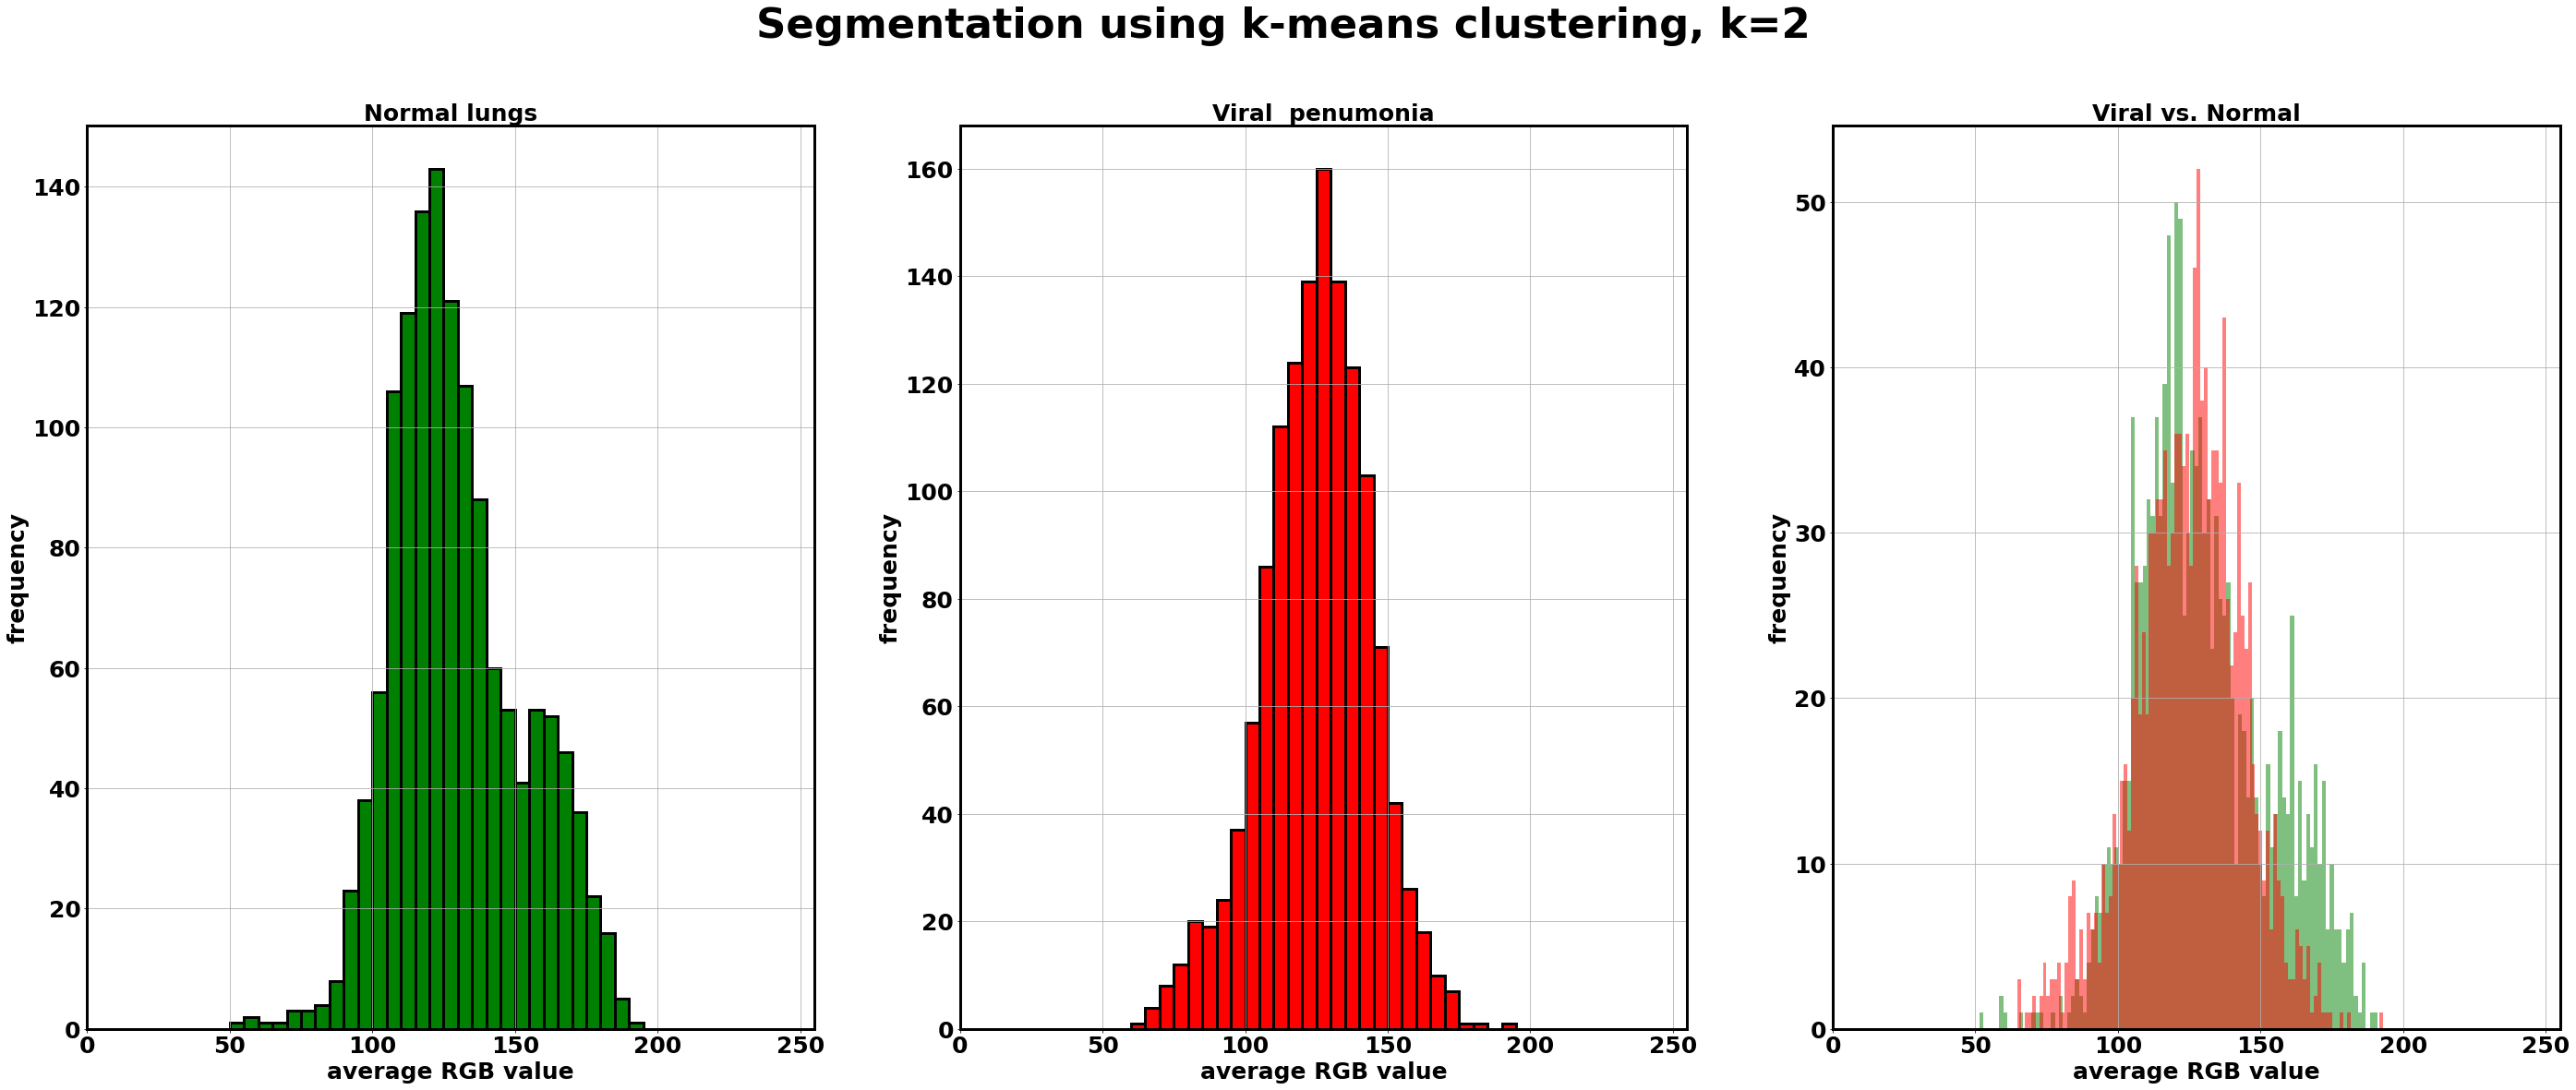

In [185]:
fs=25

plt.subplot(1,3,1)
plt.grid()
plt.hist(extract_list_from_CSV('Normal_kmeans_2_segmented_image_BGR.csv',1),np.arange(0, 260, 5),facecolor='g',edgecolor='k',linewidth=3)
plt.xlabel("average RGB value", fontsize=fs, fontweight='bold')
plt.ylabel("frequency", fontsize=fs, fontweight='bold')
plt.title("Normal lungs", fontsize=fs, fontweight='bold')
plt.xlim([0,255])
#plt.xticks([0, 1.2e5, 2.4e5,3.6e5,4.8e5], ['0', '2', '4', '6', '8'],fontsize=fs, fontweight='bold')
plt.yticks(fontsize=fs, fontweight='bold')
plt.xticks(fontsize=fs, fontweight='bold')
ax = plt.gca()
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3)

plt.subplot(1,3,2)
plt.grid()
plt.hist(extract_list_from_CSV('Viral_kmeans_2_segmented_image_BGR.csv',1),np.arange(0, 260, 5),facecolor='r',edgecolor='k',linewidth=3)
plt.xlabel("average RGB value", fontsize=fs, fontweight='bold')
plt.ylabel("frequency", fontsize=fs, fontweight='bold')
plt.title("Viral  penumonia", fontsize=fs, fontweight='bold')
plt.xlim([0,255])
#plt.xticks([0, 1.2e5, 2.4e5,3.6e5,4.8e5], ['0', '2', '4', '6', '8'],fontsize=fs, fontweight='bold')
plt.yticks(fontsize=fs, fontweight='bold')
plt.xticks(fontsize=fs, fontweight='bold')
ax = plt.gca()
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3)

plt.subplot(1,3,3)
plt.grid()
plt.hist(extract_list_from_CSV('Normal_kmeans_2_segmented_image_BGR.csv',1), 100, alpha=0.5, facecolor='g',label='Viral')
plt.hist(extract_list_from_CSV('Viral_kmeans_2_segmented_image_BGR.csv',1), 100, alpha=0.5, facecolor='r',label='Normal')
plt.xlabel("average RGB value", fontsize=fs, fontweight='bold')
plt.ylabel("frequency", fontsize=fs, fontweight='bold')
plt.title("Viral vs. Normal", fontsize=fs, fontweight='bold')
plt.xlim([0,255])
#plt.xticks([0, 1.2e5, 2.4e5,3.6e5,4.8e5], ['0', '2', '4', '6', '8'],fontsize=fs, fontweight='bold')
plt.yticks(fontsize=fs, fontweight='bold')
plt.xticks(fontsize=fs, fontweight='bold')
ax = plt.gca()
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3)

plt.gcf().set_size_inches(48, 18)
plt.suptitle("Segmentation using k-means clustering, k=2", fontsize=45, fontweight='bold', color='Black')

Text(0.5, 0.98, 'Segmentation using k-means clustering, k=4')

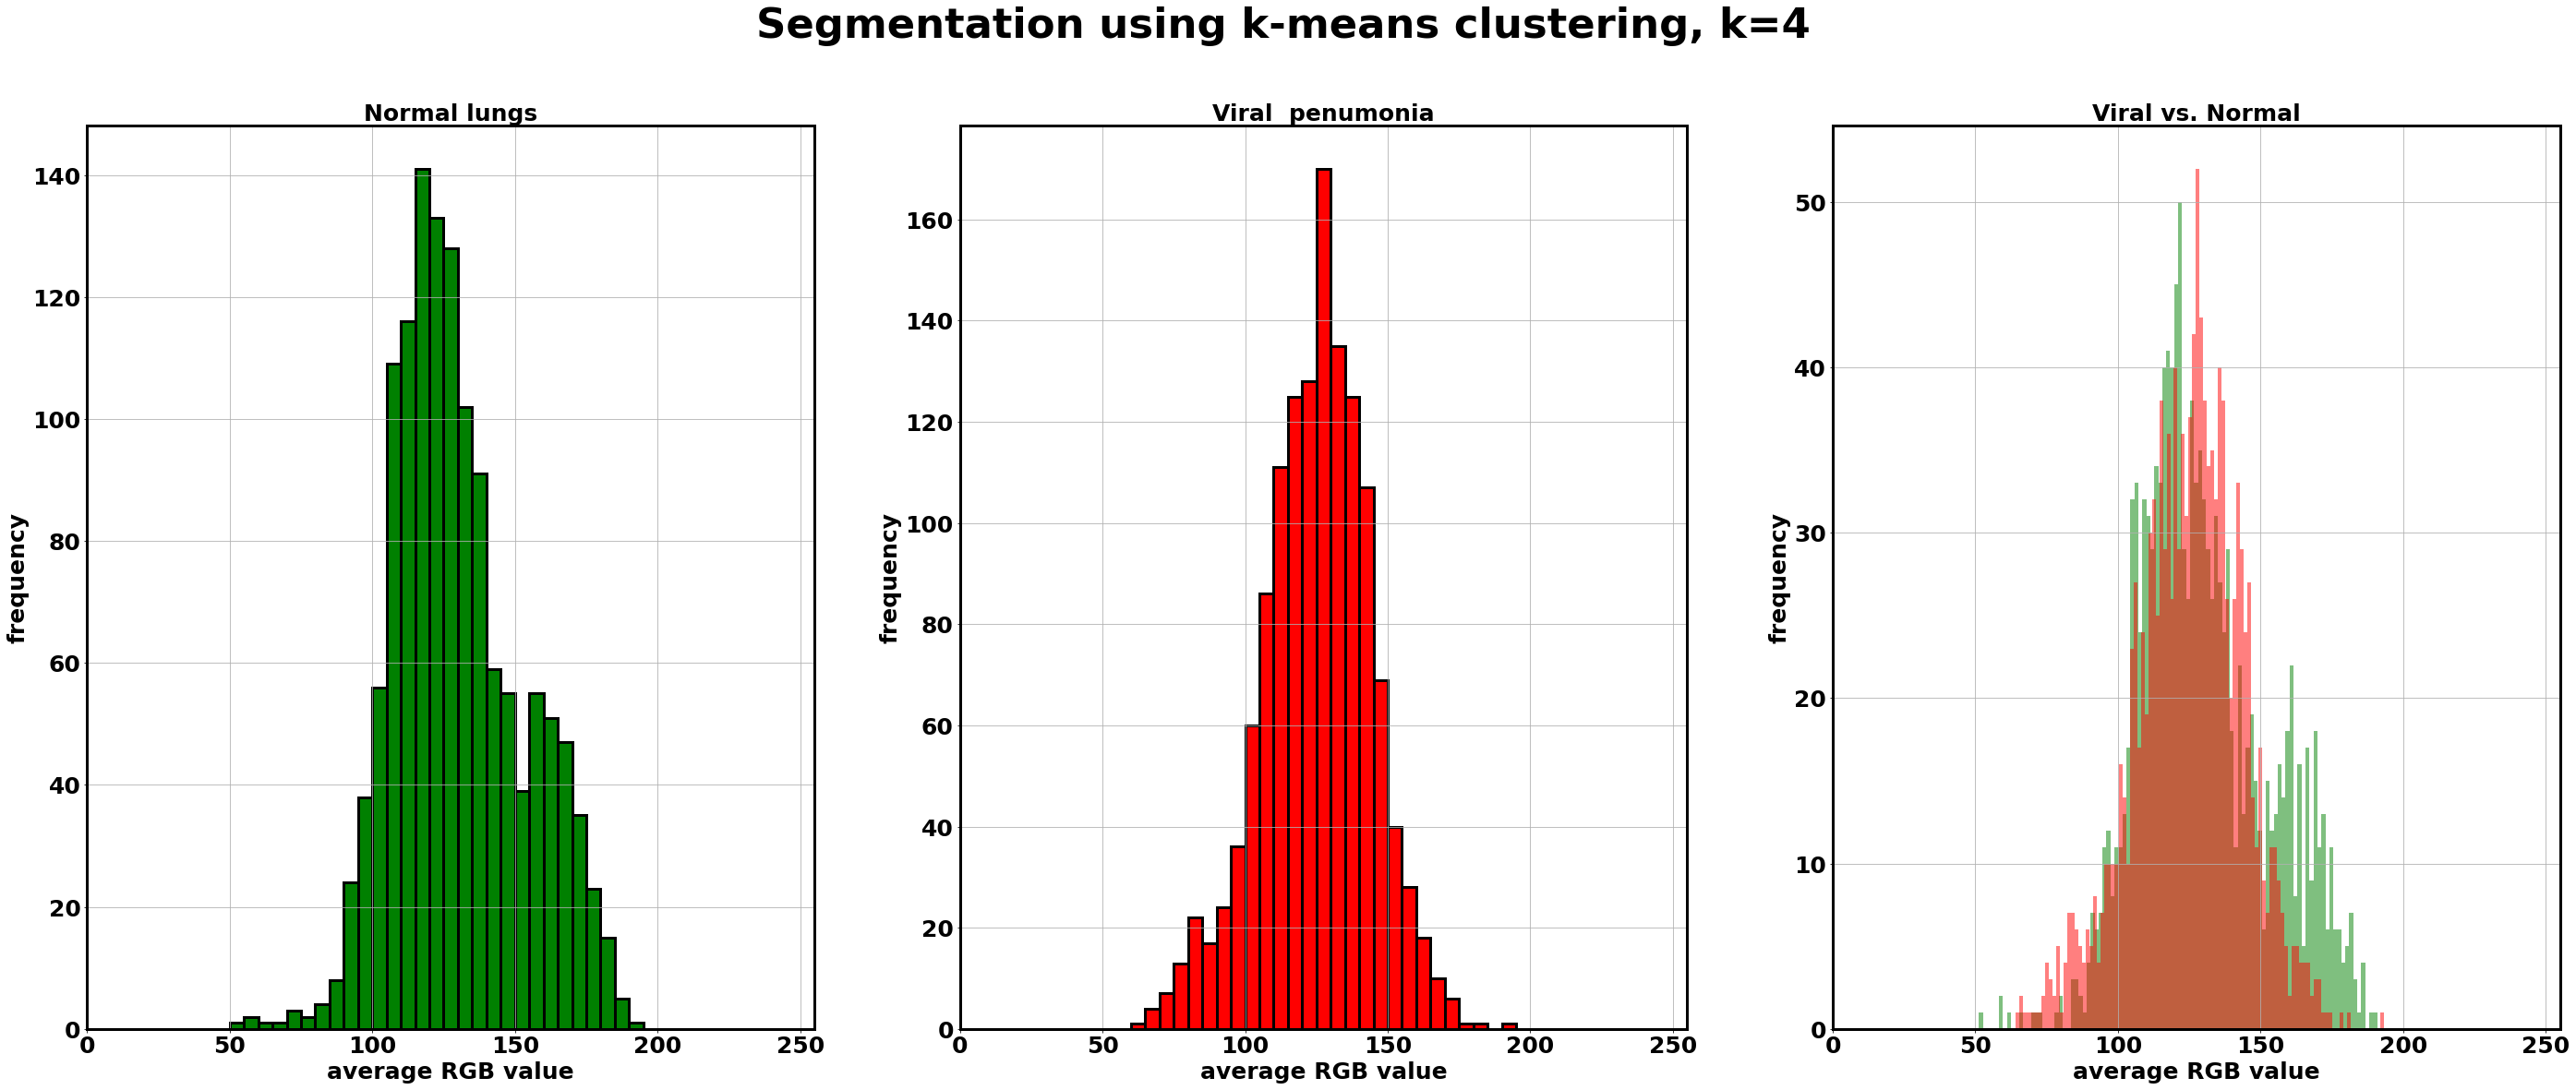

In [186]:
fs=25

plt.subplot(1,3,1)
plt.grid()
plt.hist(extract_list_from_CSV('Normal_kmeans_4_segmented_image_BGR.csv',1),np.arange(0, 260, 5),facecolor='g',edgecolor='k',linewidth=3)
plt.xlabel("average RGB value", fontsize=fs, fontweight='bold')
plt.ylabel("frequency", fontsize=fs, fontweight='bold')
plt.title("Normal lungs", fontsize=fs, fontweight='bold')
plt.xlim([0,255])
#plt.xticks([0, 1.2e5, 2.4e5,3.6e5,4.8e5], ['0', '2', '4', '6', '8'],fontsize=fs, fontweight='bold')
plt.yticks(fontsize=fs, fontweight='bold')
plt.xticks(fontsize=fs, fontweight='bold')
ax = plt.gca()
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3)

plt.subplot(1,3,2)
plt.grid()
plt.hist(extract_list_from_CSV('Viral_kmeans_4_segmented_image_BGR.csv',1),np.arange(0, 260, 5),facecolor='r',edgecolor='k',linewidth=3)
plt.xlabel("average RGB value", fontsize=fs, fontweight='bold')
plt.ylabel("frequency", fontsize=fs, fontweight='bold')
plt.title("Viral  penumonia", fontsize=fs, fontweight='bold')
plt.xlim([0,255])
#plt.xticks([0, 1.2e5, 2.4e5,3.6e5,4.8e5], ['0', '2', '4', '6', '8'],fontsize=fs, fontweight='bold')
plt.yticks(fontsize=fs, fontweight='bold')
plt.xticks(fontsize=fs, fontweight='bold')
ax = plt.gca()
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3)

plt.subplot(1,3,3)
plt.grid()
plt.hist(extract_list_from_CSV('Normal_kmeans_4_segmented_image_BGR.csv',1), 100, alpha=0.5, facecolor='g',label='Viral')
plt.hist(extract_list_from_CSV('Viral_kmeans_4_segmented_image_BGR.csv',1), 100, alpha=0.5, facecolor='r',label='Normal')
plt.xlabel("average RGB value", fontsize=fs, fontweight='bold')
plt.ylabel("frequency", fontsize=fs, fontweight='bold')
plt.title("Viral vs. Normal", fontsize=fs, fontweight='bold')
plt.xlim([0,255])
#plt.xticks([0, 1.2e5, 2.4e5,3.6e5,4.8e5], ['0', '2', '4', '6', '8'],fontsize=fs, fontweight='bold')
plt.yticks(fontsize=fs, fontweight='bold')
plt.xticks(fontsize=fs, fontweight='bold')
ax = plt.gca()
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3)

plt.gcf().set_size_inches(48, 18)
plt.suptitle("Segmentation using k-means clustering, k=4", fontsize=45, fontweight='bold', color='Black')

### There is no significant overlap between two image sets when we are considering segmentation using k-means clustering

# Segmentation analysis using contours

In [101]:
#This function calculates the dark fraction in an image after segmentation using contours
def calculate_dark_fraction_segmented_contour(filename):
    img = cv2.imread(filename)
    img = cv2.resize(img,(256,256))
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    _,thresh = cv2.threshold(gray, np.mean(gray), 255, cv2.THRESH_BINARY_INV)
    edges = cv2.dilate(cv2.Canny(thresh,0,255),None)
    cnt = sorted(cv2.findContours(edges, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2], key=cv2.contourArea)[-1]
    mask = np.zeros((256,256), np.uint8)
    masked = cv2.drawContours(mask, [cnt],-1, 255, -1)
    dst = cv2.bitwise_and(img, img, mask=mask)
    result_image = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)

    dark_fraction=0;
    for i in range(result_image.shape[0]):
        for j in range(result_image.shape[1]):
            b,g,r = (result_image[i, j])
            if b+g+r==0:
                dark_fraction+=1;
    dark_fraction=dark_fraction/(result_image.shape[0]*result_image.shape[1])
    return dark_fraction

In [104]:
#Lists for RGB values for viral penumonia images
dark_frac_viral=[];


#Lists for RGB values for normal images
dark_frac_normal=[];


for k in range(len(df['filename'])):
    print("progress = "+str(round(k*100/len(df['filename']),2))+'%')
    if df['category'][k]=='1':
        print("viral")
        vlist=calculate_dark_fraction_segmented_contour(df['filename'][k])
        dark_frac_viral.append(vlist)
    else:
        print("normal")
        vlist=calculate_dark_fraction_segmented_contour(df['filename'][k])
        dark_frac_normal.append(vlist)

progress = 0.0%
viral
progress = 0.04%
viral
progress = 0.07%
viral
progress = 0.11%
viral
progress = 0.15%
viral
progress = 0.19%
viral
progress = 0.22%
viral
progress = 0.26%
viral
progress = 0.3%
viral
progress = 0.33%
viral
progress = 0.37%
viral
progress = 0.41%
viral
progress = 0.45%
viral
progress = 0.48%
viral
progress = 0.52%
viral
progress = 0.56%
viral
progress = 0.59%
viral
progress = 0.63%
viral
progress = 0.67%
viral
progress = 0.71%
viral
progress = 0.74%
viral
progress = 0.78%
viral
progress = 0.82%
viral
progress = 0.86%
viral
progress = 0.89%
viral
progress = 0.93%
viral
progress = 0.97%
viral
progress = 1.0%
viral
progress = 1.04%
viral
progress = 1.08%
viral
progress = 1.12%
viral
progress = 1.15%
viral
progress = 1.19%
viral
progress = 1.23%
viral
progress = 1.26%
viral
progress = 1.3%
viral
progress = 1.34%
viral
progress = 1.38%
viral
progress = 1.41%
viral
progress = 1.45%
viral
progress = 1.49%
viral
progress = 1.52%
viral
progress = 1.56%
viral
progress = 1.6%

progress = 13.23%
viral
progress = 13.27%
viral
progress = 13.31%
viral
progress = 13.35%
viral
progress = 13.38%
viral
progress = 13.42%
viral
progress = 13.46%
viral
progress = 13.49%
viral
progress = 13.53%
viral
progress = 13.57%
viral
progress = 13.61%
viral
progress = 13.64%
viral
progress = 13.68%
viral
progress = 13.72%
viral
progress = 13.75%
viral
progress = 13.79%
viral
progress = 13.83%
viral
progress = 13.87%
viral
progress = 13.9%
viral
progress = 13.94%
viral
progress = 13.98%
viral
progress = 14.01%
viral
progress = 14.05%
viral
progress = 14.09%
viral
progress = 14.13%
viral
progress = 14.16%
viral
progress = 14.2%
viral
progress = 14.24%
viral
progress = 14.28%
viral
progress = 14.31%
viral
progress = 14.35%
viral
progress = 14.39%
viral
progress = 14.42%
viral
progress = 14.46%
viral
progress = 14.5%
viral
progress = 14.54%
viral
progress = 14.57%
viral
progress = 14.61%
viral
progress = 14.65%
viral
progress = 14.68%
viral
progress = 14.72%
viral
progress = 14.76%
v

progress = 25.99%
viral
progress = 26.02%
viral
progress = 26.06%
viral
progress = 26.1%
viral
progress = 26.13%
viral
progress = 26.17%
viral
progress = 26.21%
viral
progress = 26.25%
viral
progress = 26.28%
viral
progress = 26.32%
viral
progress = 26.36%
viral
progress = 26.39%
viral
progress = 26.43%
viral
progress = 26.47%
viral
progress = 26.51%
viral
progress = 26.54%
viral
progress = 26.58%
viral
progress = 26.62%
viral
progress = 26.65%
viral
progress = 26.69%
viral
progress = 26.73%
viral
progress = 26.77%
viral
progress = 26.8%
viral
progress = 26.84%
viral
progress = 26.88%
viral
progress = 26.91%
viral
progress = 26.95%
viral
progress = 26.99%
viral
progress = 27.03%
viral
progress = 27.06%
viral
progress = 27.1%
viral
progress = 27.14%
viral
progress = 27.17%
viral
progress = 27.21%
viral
progress = 27.25%
viral
progress = 27.29%
viral
progress = 27.32%
viral
progress = 27.36%
viral
progress = 27.4%
viral
progress = 27.43%
viral
progress = 27.47%
viral
progress = 27.51%
vi

progress = 38.74%
viral
progress = 38.77%
viral
progress = 38.81%
viral
progress = 38.85%
viral
progress = 38.88%
viral
progress = 38.92%
viral
progress = 38.96%
viral
progress = 39.0%
viral
progress = 39.03%
viral
progress = 39.07%
viral
progress = 39.11%
viral
progress = 39.14%
viral
progress = 39.18%
viral
progress = 39.22%
viral
progress = 39.26%
viral
progress = 39.29%
viral
progress = 39.33%
viral
progress = 39.37%
viral
progress = 39.41%
viral
progress = 39.44%
viral
progress = 39.48%
viral
progress = 39.52%
viral
progress = 39.55%
viral
progress = 39.59%
viral
progress = 39.63%
viral
progress = 39.67%
viral
progress = 39.7%
viral
progress = 39.74%
viral
progress = 39.78%
viral
progress = 39.81%
viral
progress = 39.85%
viral
progress = 39.89%
viral
progress = 39.93%
viral
progress = 39.96%
viral
progress = 40.0%
viral
progress = 40.04%
viral
progress = 40.07%
viral
progress = 40.11%
viral
progress = 40.15%
viral
progress = 40.19%
viral
progress = 40.22%
viral
progress = 40.26%
v

progress = 51.45%
normal
progress = 51.49%
normal
progress = 51.52%
normal
progress = 51.56%
normal
progress = 51.6%
normal
progress = 51.64%
normal
progress = 51.67%
normal
progress = 51.71%
normal
progress = 51.75%
normal
progress = 51.78%
normal
progress = 51.82%
normal
progress = 51.86%
normal
progress = 51.9%
normal
progress = 51.93%
normal
progress = 51.97%
normal
progress = 52.01%
normal
progress = 52.04%
normal
progress = 52.08%
normal
progress = 52.12%
normal
progress = 52.16%
normal
progress = 52.19%
normal
progress = 52.23%
normal
progress = 52.27%
normal
progress = 52.3%
normal
progress = 52.34%
normal
progress = 52.38%
normal
progress = 52.42%
normal
progress = 52.45%
normal
progress = 52.49%
normal
progress = 52.53%
normal
progress = 52.57%
normal
progress = 52.6%
normal
progress = 52.64%
normal
progress = 52.68%
normal
progress = 52.71%
normal
progress = 52.75%
normal
progress = 52.79%
normal
progress = 52.83%
normal
progress = 52.86%
normal
progress = 52.9%
normal
progr

progress = 63.72%
normal
progress = 63.75%
normal
progress = 63.79%
normal
progress = 63.83%
normal
progress = 63.87%
normal
progress = 63.9%
normal
progress = 63.94%
normal
progress = 63.98%
normal
progress = 64.01%
normal
progress = 64.05%
normal
progress = 64.09%
normal
progress = 64.13%
normal
progress = 64.16%
normal
progress = 64.2%
normal
progress = 64.24%
normal
progress = 64.28%
normal
progress = 64.31%
normal
progress = 64.35%
normal
progress = 64.39%
normal
progress = 64.42%
normal
progress = 64.46%
normal
progress = 64.5%
normal
progress = 64.54%
normal
progress = 64.57%
normal
progress = 64.61%
normal
progress = 64.65%
normal
progress = 64.68%
normal
progress = 64.72%
normal
progress = 64.76%
normal
progress = 64.8%
normal
progress = 64.83%
normal
progress = 64.87%
normal
progress = 64.91%
normal
progress = 64.94%
normal
progress = 64.98%
normal
progress = 65.02%
normal
progress = 65.06%
normal
progress = 65.09%
normal
progress = 65.13%
normal
progress = 65.17%
normal
prog

progress = 75.99%
normal
progress = 76.02%
normal
progress = 76.06%
normal
progress = 76.1%
normal
progress = 76.13%
normal
progress = 76.17%
normal
progress = 76.21%
normal
progress = 76.25%
normal
progress = 76.28%
normal
progress = 76.32%
normal
progress = 76.36%
normal
progress = 76.39%
normal
progress = 76.43%
normal
progress = 76.47%
normal
progress = 76.51%
normal
progress = 76.54%
normal
progress = 76.58%
normal
progress = 76.62%
normal
progress = 76.65%
normal
progress = 76.69%
normal
progress = 76.73%
normal
progress = 76.77%
normal
progress = 76.8%
normal
progress = 76.84%
normal
progress = 76.88%
normal
progress = 76.91%
normal
progress = 76.95%
normal
progress = 76.99%
normal
progress = 77.03%
normal
progress = 77.06%
normal
progress = 77.1%
normal
progress = 77.14%
normal
progress = 77.17%
normal
progress = 77.21%
normal
progress = 77.25%
normal
progress = 77.29%
normal
progress = 77.32%
normal
progress = 77.36%
normal
progress = 77.4%
normal
progress = 77.43%
normal
prog

progress = 88.25%
normal
progress = 88.29%
normal
progress = 88.33%
normal
progress = 88.36%
normal
progress = 88.4%
normal
progress = 88.44%
normal
progress = 88.48%
normal
progress = 88.51%
normal
progress = 88.55%
normal
progress = 88.59%
normal
progress = 88.62%
normal
progress = 88.66%
normal
progress = 88.7%
normal
progress = 88.74%
normal
progress = 88.77%
normal
progress = 88.81%
normal
progress = 88.85%
normal
progress = 88.88%
normal
progress = 88.92%
normal
progress = 88.96%
normal
progress = 89.0%
normal
progress = 89.03%
normal
progress = 89.07%
normal
progress = 89.11%
normal
progress = 89.14%
normal
progress = 89.18%
normal
progress = 89.22%
normal
progress = 89.26%
normal
progress = 89.29%
normal
progress = 89.33%
normal
progress = 89.37%
normal
progress = 89.41%
normal
progress = 89.44%
normal
progress = 89.48%
normal
progress = 89.52%
normal
progress = 89.55%
normal
progress = 89.59%
normal
progress = 89.63%
normal
progress = 89.67%
normal
progress = 89.7%
normal
prog

In [105]:
#Save data to files 
#dict = {'DF': dark_frac_normal}  
       
#dff = pd.DataFrame(dict) 
    
# saving the dataframe 
#dff.to_csv('Normal_dark_frac_segmented_contour_0_to_255.csv') 

# dictionary of lists  
#dict = {'DF': dark_frac_viral}  
       
#dff = pd.DataFrame(dict) 
    
# saving the dataframe 
#dff.to_csv('Viral_dark_frac_segmented_contour_0_to_255.csv') 

### Overlap between datasets

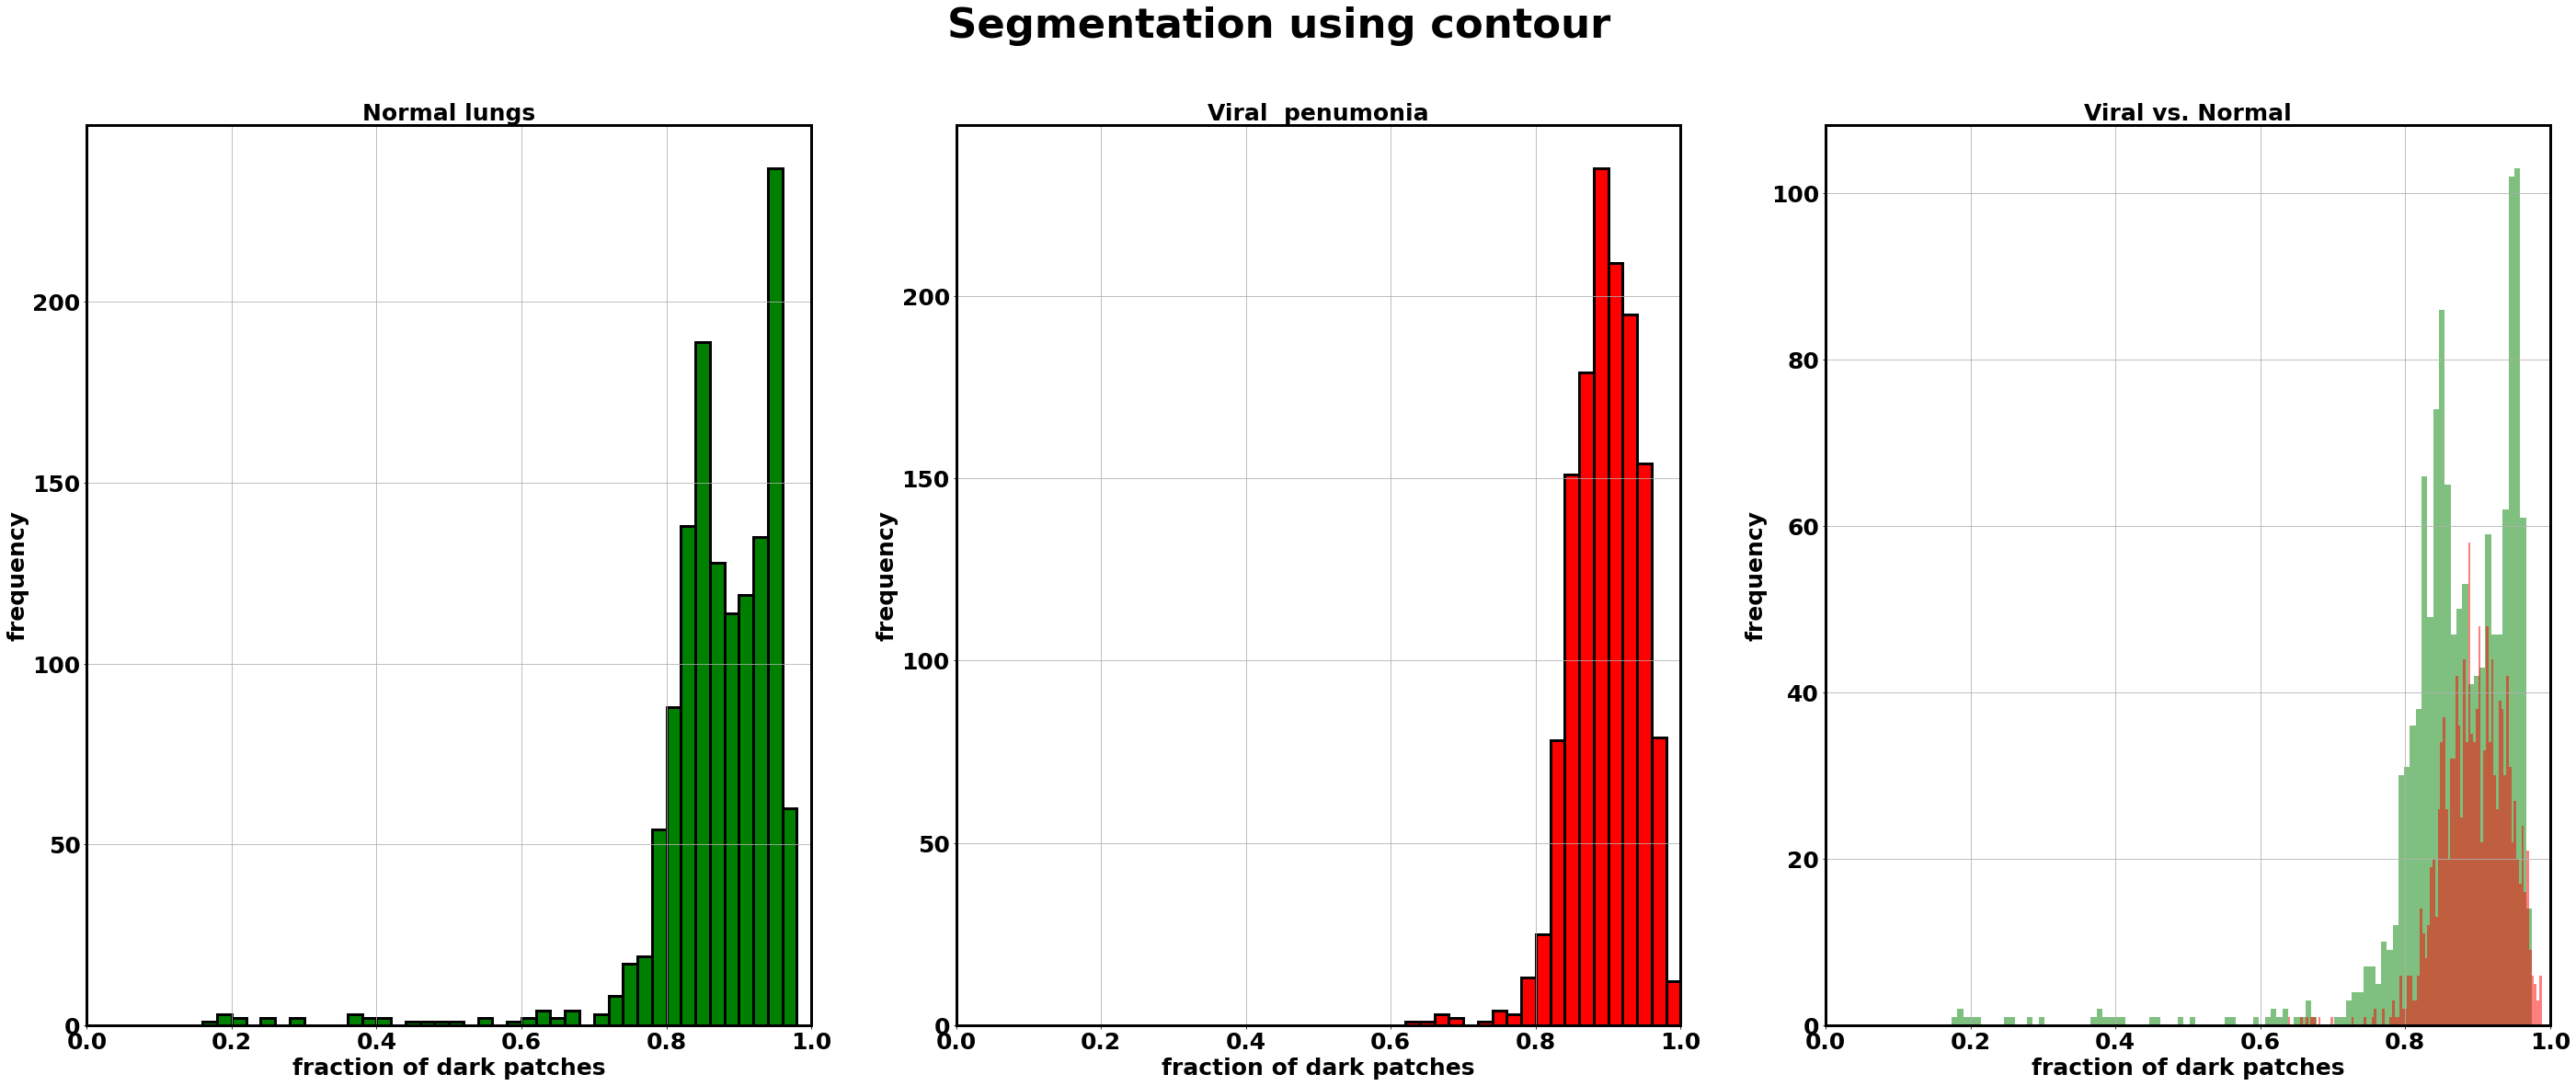

In [187]:
fs=25
import matplotlib.pyplot as plt

plt.subplot(1,3,1)
plt.grid()
plt.hist(extract_list_from_CSV('Normal_dark_frac_segmented_contour_0_to_255.csv',1),np.arange(0, 1.02, 0.02),facecolor='g',edgecolor='k',linewidth=3)
plt.xlabel("fraction of dark patches", fontsize=fs, fontweight='bold')
plt.ylabel("frequency", fontsize=fs, fontweight='bold')
plt.title("Normal lungs", fontsize=fs, fontweight='bold')
plt.xlim([0,1])
#plt.xticks([0, 1.2e5, 2.4e5,3.6e5,4.8e5], ['0', '2', '4', '6', '8'],fontsize=fs, fontweight='bold')
plt.yticks(fontsize=fs, fontweight='bold')
plt.xticks(fontsize=fs, fontweight='bold')
ax = plt.gca()
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3)

plt.subplot(1,3,2)
plt.grid()
plt.hist(extract_list_from_CSV('Viral_dark_frac_segmented_contour_0_to_255.csv',1),np.arange(0, 1.02, 0.02),facecolor='r',edgecolor='k',linewidth=3)
plt.xlabel("fraction of dark patches", fontsize=fs, fontweight='bold')
plt.ylabel("frequency", fontsize=fs, fontweight='bold')
plt.title("Viral  penumonia", fontsize=fs, fontweight='bold')
plt.xlim([0,1])
#plt.xticks([0, 1.2e5, 2.4e5,3.6e5,4.8e5], ['0', '2', '4', '6', '8'],fontsize=fs, fontweight='bold')
plt.yticks(fontsize=fs, fontweight='bold')
plt.xticks(fontsize=fs, fontweight='bold')
ax = plt.gca()
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3)

plt.subplot(1,3,3)
plt.grid()
plt.hist(extract_list_from_CSV('Normal_dark_frac_segmented_contour_0_to_255.csv',1), 100, alpha=0.5, facecolor='g',label='Viral')
plt.hist(extract_list_from_CSV('Viral_dark_frac_segmented_contour_0_to_255.csv',1), 100, alpha=0.5, facecolor='r',label='Normal')
plt.xlabel("fraction of dark patches", fontsize=fs, fontweight='bold')
plt.ylabel("frequency", fontsize=fs, fontweight='bold')
plt.title("Viral vs. Normal", fontsize=fs, fontweight='bold')
plt.xlim([0,1])
#plt.xticks([0, 1.2e5, 2.4e5,3.6e5,4.8e5], ['0', '2', '4', '6', '8'],fontsize=fs, fontweight='bold')
plt.yticks(fontsize=fs, fontweight='bold')
plt.xticks(fontsize=fs, fontweight='bold')
ax = plt.gca()
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3)

plt.gcf().set_size_inches(48, 18)
plt.suptitle("Segmentation using contour", fontsize=45, fontweight='bold', color='Black')
plt.show()

## Segmentation using contour is not efficient in differentiating between two types of images

# Let us now analyze how image segmentation using thresolding can help us distinguish COVID from non covid lungs
Let us first write a function that detects the fraction of dark patches in an image after segmentation is done using thresolding

In [130]:
def calculate_dark_fraction_segmented_thresold(filename):
    img = cv2.imread(filename)
    img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img_gray=cv2.cvtColor(img_rgb,cv2.COLOR_RGB2GRAY)
    from skimage.filters import threshold_otsu
    def filter_image(image, mask):
        r = image[:,:,0] * mask
        g = image[:,:,1] * mask
        b = image[:,:,2] * mask
        return np.dstack([r,g,b])

    thresh = threshold_otsu(img_gray)
    img_otsu  = img_gray < thresh
    result_image = filter_image(img, img_otsu)
    dark_fraction=0;
    for i in range(result_image.shape[0]):
        for j in range(result_image.shape[1]):
            b,g,r = (result_image[i, j])
            if b+g+r==0:
                dark_fraction+=1;
    dark_fraction=dark_fraction/(result_image.shape[0]*result_image.shape[1])
    return dark_fraction

In [133]:
#Lists for RGB values for viral penumonia images
dark_frac_viral=[];


#Lists for RGB values for normal images
dark_frac_normal=[];


for k in range(len(df['filename'])):
    print("progress = "+str(round(k*100/len(df['filename']),2))+'%')
    if df['category'][k]=='1':
        print("viral")
        vlist=calculate_dark_fraction_segmented_thresold(df['filename'][k])
        dark_frac_viral.append(vlist)
    else:
        print("normal")
        vlist=calculate_dark_fraction_segmented_thresold(df['filename'][k])
        dark_frac_normal.append(vlist)

progress = 0.0%
viral
progress = 0.04%
viral
progress = 0.07%
viral
progress = 0.11%
viral
progress = 0.15%
viral
progress = 0.19%
viral
progress = 0.22%
viral
progress = 0.26%
viral
progress = 0.3%
viral
progress = 0.33%
viral
progress = 0.37%
viral
progress = 0.41%
viral
progress = 0.45%
viral
progress = 0.48%
viral
progress = 0.52%
viral
progress = 0.56%
viral
progress = 0.59%
viral
progress = 0.63%
viral
progress = 0.67%
viral
progress = 0.71%
viral
progress = 0.74%
viral
progress = 0.78%
viral
progress = 0.82%
viral
progress = 0.86%
viral
progress = 0.89%
viral
progress = 0.93%
viral
progress = 0.97%
viral
progress = 1.0%
viral
progress = 1.04%
viral
progress = 1.08%
viral
progress = 1.12%
viral
progress = 1.15%
viral
progress = 1.19%
viral
progress = 1.23%
viral
progress = 1.26%
viral
progress = 1.3%
viral
progress = 1.34%
viral
progress = 1.38%
viral
progress = 1.41%
viral
progress = 1.45%
viral
progress = 1.49%
viral
progress = 1.52%
viral
progress = 1.56%
viral
progress = 1.6%

progress = 13.2%
viral
progress = 13.23%
viral
progress = 13.27%
viral
progress = 13.31%
viral
progress = 13.35%
viral
progress = 13.38%
viral
progress = 13.42%
viral
progress = 13.46%
viral
progress = 13.49%
viral
progress = 13.53%
viral
progress = 13.57%
viral
progress = 13.61%
viral
progress = 13.64%
viral
progress = 13.68%
viral
progress = 13.72%
viral
progress = 13.75%
viral
progress = 13.79%
viral
progress = 13.83%
viral
progress = 13.87%
viral
progress = 13.9%
viral
progress = 13.94%
viral
progress = 13.98%
viral
progress = 14.01%
viral
progress = 14.05%
viral
progress = 14.09%
viral
progress = 14.13%
viral
progress = 14.16%
viral
progress = 14.2%
viral
progress = 14.24%
viral
progress = 14.28%
viral
progress = 14.31%
viral
progress = 14.35%
viral
progress = 14.39%
viral
progress = 14.42%
viral
progress = 14.46%
viral
progress = 14.5%
viral
progress = 14.54%
viral
progress = 14.57%
viral
progress = 14.61%
viral
progress = 14.65%
viral
progress = 14.68%
viral
progress = 14.72%
vi

progress = 25.95%
viral
progress = 25.99%
viral
progress = 26.02%
viral
progress = 26.06%
viral
progress = 26.1%
viral
progress = 26.13%
viral
progress = 26.17%
viral
progress = 26.21%
viral
progress = 26.25%
viral
progress = 26.28%
viral
progress = 26.32%
viral
progress = 26.36%
viral
progress = 26.39%
viral
progress = 26.43%
viral
progress = 26.47%
viral
progress = 26.51%
viral
progress = 26.54%
viral
progress = 26.58%
viral
progress = 26.62%
viral
progress = 26.65%
viral
progress = 26.69%
viral
progress = 26.73%
viral
progress = 26.77%
viral
progress = 26.8%
viral
progress = 26.84%
viral
progress = 26.88%
viral
progress = 26.91%
viral
progress = 26.95%
viral
progress = 26.99%
viral
progress = 27.03%
viral
progress = 27.06%
viral
progress = 27.1%
viral
progress = 27.14%
viral
progress = 27.17%
viral
progress = 27.21%
viral
progress = 27.25%
viral
progress = 27.29%
viral
progress = 27.32%
viral
progress = 27.36%
viral
progress = 27.4%
viral
progress = 27.43%
viral
progress = 27.47%
vi

progress = 38.7%
viral
progress = 38.74%
viral
progress = 38.77%
viral
progress = 38.81%
viral
progress = 38.85%
viral
progress = 38.88%
viral
progress = 38.92%
viral
progress = 38.96%
viral
progress = 39.0%
viral
progress = 39.03%
viral
progress = 39.07%
viral
progress = 39.11%
viral
progress = 39.14%
viral
progress = 39.18%
viral
progress = 39.22%
viral
progress = 39.26%
viral
progress = 39.29%
viral
progress = 39.33%
viral
progress = 39.37%
viral
progress = 39.41%
viral
progress = 39.44%
viral
progress = 39.48%
viral
progress = 39.52%
viral
progress = 39.55%
viral
progress = 39.59%
viral
progress = 39.63%
viral
progress = 39.67%
viral
progress = 39.7%
viral
progress = 39.74%
viral
progress = 39.78%
viral
progress = 39.81%
viral
progress = 39.85%
viral
progress = 39.89%
viral
progress = 39.93%
viral
progress = 39.96%
viral
progress = 40.0%
viral
progress = 40.04%
viral
progress = 40.07%
viral
progress = 40.11%
viral
progress = 40.15%
viral
progress = 40.19%
viral
progress = 40.22%
vi

progress = 51.41%
normal
progress = 51.45%
normal
progress = 51.49%
normal
progress = 51.52%
normal
progress = 51.56%
normal
progress = 51.6%
normal
progress = 51.64%
normal
progress = 51.67%
normal
progress = 51.71%
normal
progress = 51.75%
normal
progress = 51.78%
normal
progress = 51.82%
normal
progress = 51.86%
normal
progress = 51.9%
normal
progress = 51.93%
normal
progress = 51.97%
normal
progress = 52.01%
normal
progress = 52.04%
normal
progress = 52.08%
normal
progress = 52.12%
normal
progress = 52.16%
normal
progress = 52.19%
normal
progress = 52.23%
normal
progress = 52.27%
normal
progress = 52.3%
normal
progress = 52.34%
normal
progress = 52.38%
normal
progress = 52.42%
normal
progress = 52.45%
normal
progress = 52.49%
normal
progress = 52.53%
normal
progress = 52.57%
normal
progress = 52.6%
normal
progress = 52.64%
normal
progress = 52.68%
normal
progress = 52.71%
normal
progress = 52.75%
normal
progress = 52.79%
normal
progress = 52.83%
normal
progress = 52.86%
normal
prog

progress = 63.68%
normal
progress = 63.72%
normal
progress = 63.75%
normal
progress = 63.79%
normal
progress = 63.83%
normal
progress = 63.87%
normal
progress = 63.9%
normal
progress = 63.94%
normal
progress = 63.98%
normal
progress = 64.01%
normal
progress = 64.05%
normal
progress = 64.09%
normal
progress = 64.13%
normal
progress = 64.16%
normal
progress = 64.2%
normal
progress = 64.24%
normal
progress = 64.28%
normal
progress = 64.31%
normal
progress = 64.35%
normal
progress = 64.39%
normal
progress = 64.42%
normal
progress = 64.46%
normal
progress = 64.5%
normal
progress = 64.54%
normal
progress = 64.57%
normal
progress = 64.61%
normal
progress = 64.65%
normal
progress = 64.68%
normal
progress = 64.72%
normal
progress = 64.76%
normal
progress = 64.8%
normal
progress = 64.83%
normal
progress = 64.87%
normal
progress = 64.91%
normal
progress = 64.94%
normal
progress = 64.98%
normal
progress = 65.02%
normal
progress = 65.06%
normal
progress = 65.09%
normal
progress = 65.13%
normal
prog

progress = 75.95%
normal
progress = 75.99%
normal
progress = 76.02%
normal
progress = 76.06%
normal
progress = 76.1%
normal
progress = 76.13%
normal
progress = 76.17%
normal
progress = 76.21%
normal
progress = 76.25%
normal
progress = 76.28%
normal
progress = 76.32%
normal
progress = 76.36%
normal
progress = 76.39%
normal
progress = 76.43%
normal
progress = 76.47%
normal
progress = 76.51%
normal
progress = 76.54%
normal
progress = 76.58%
normal
progress = 76.62%
normal
progress = 76.65%
normal
progress = 76.69%
normal
progress = 76.73%
normal
progress = 76.77%
normal
progress = 76.8%
normal
progress = 76.84%
normal
progress = 76.88%
normal
progress = 76.91%
normal
progress = 76.95%
normal
progress = 76.99%
normal
progress = 77.03%
normal
progress = 77.06%
normal
progress = 77.1%
normal
progress = 77.14%
normal
progress = 77.17%
normal
progress = 77.21%
normal
progress = 77.25%
normal
progress = 77.29%
normal
progress = 77.32%
normal
progress = 77.36%
normal
progress = 77.4%
normal
prog

progress = 88.22%
normal
progress = 88.25%
normal
progress = 88.29%
normal
progress = 88.33%
normal
progress = 88.36%
normal
progress = 88.4%
normal
progress = 88.44%
normal
progress = 88.48%
normal
progress = 88.51%
normal
progress = 88.55%
normal
progress = 88.59%
normal
progress = 88.62%
normal
progress = 88.66%
normal
progress = 88.7%
normal
progress = 88.74%
normal
progress = 88.77%
normal
progress = 88.81%
normal
progress = 88.85%
normal
progress = 88.88%
normal
progress = 88.92%
normal
progress = 88.96%
normal
progress = 89.0%
normal
progress = 89.03%
normal
progress = 89.07%
normal
progress = 89.11%
normal
progress = 89.14%
normal
progress = 89.18%
normal
progress = 89.22%
normal
progress = 89.26%
normal
progress = 89.29%
normal
progress = 89.33%
normal
progress = 89.37%
normal
progress = 89.41%
normal
progress = 89.44%
normal
progress = 89.48%
normal
progress = 89.52%
normal
progress = 89.55%
normal
progress = 89.59%
normal
progress = 89.63%
normal
progress = 89.67%
normal
pro

In [134]:
#Save data to files 
#dict = {'DF': dark_frac_normal}  
       
#dff = pd.DataFrame(dict) 
    
# saving the dataframe 
#dff.to_csv('Normal_dark_frac_segmented_thresold.csv') 

# dictionary of lists  
#dict = {'DF': dark_frac_viral}  
       
#dff = pd.DataFrame(dict) 
    
# saving the dataframe 
#dff.to_csv('Viral_dark_frac_segmented_thresold.csv') 

## Checking overlap

Text(0.5, 0.98, 'Segmentation using thresholding')

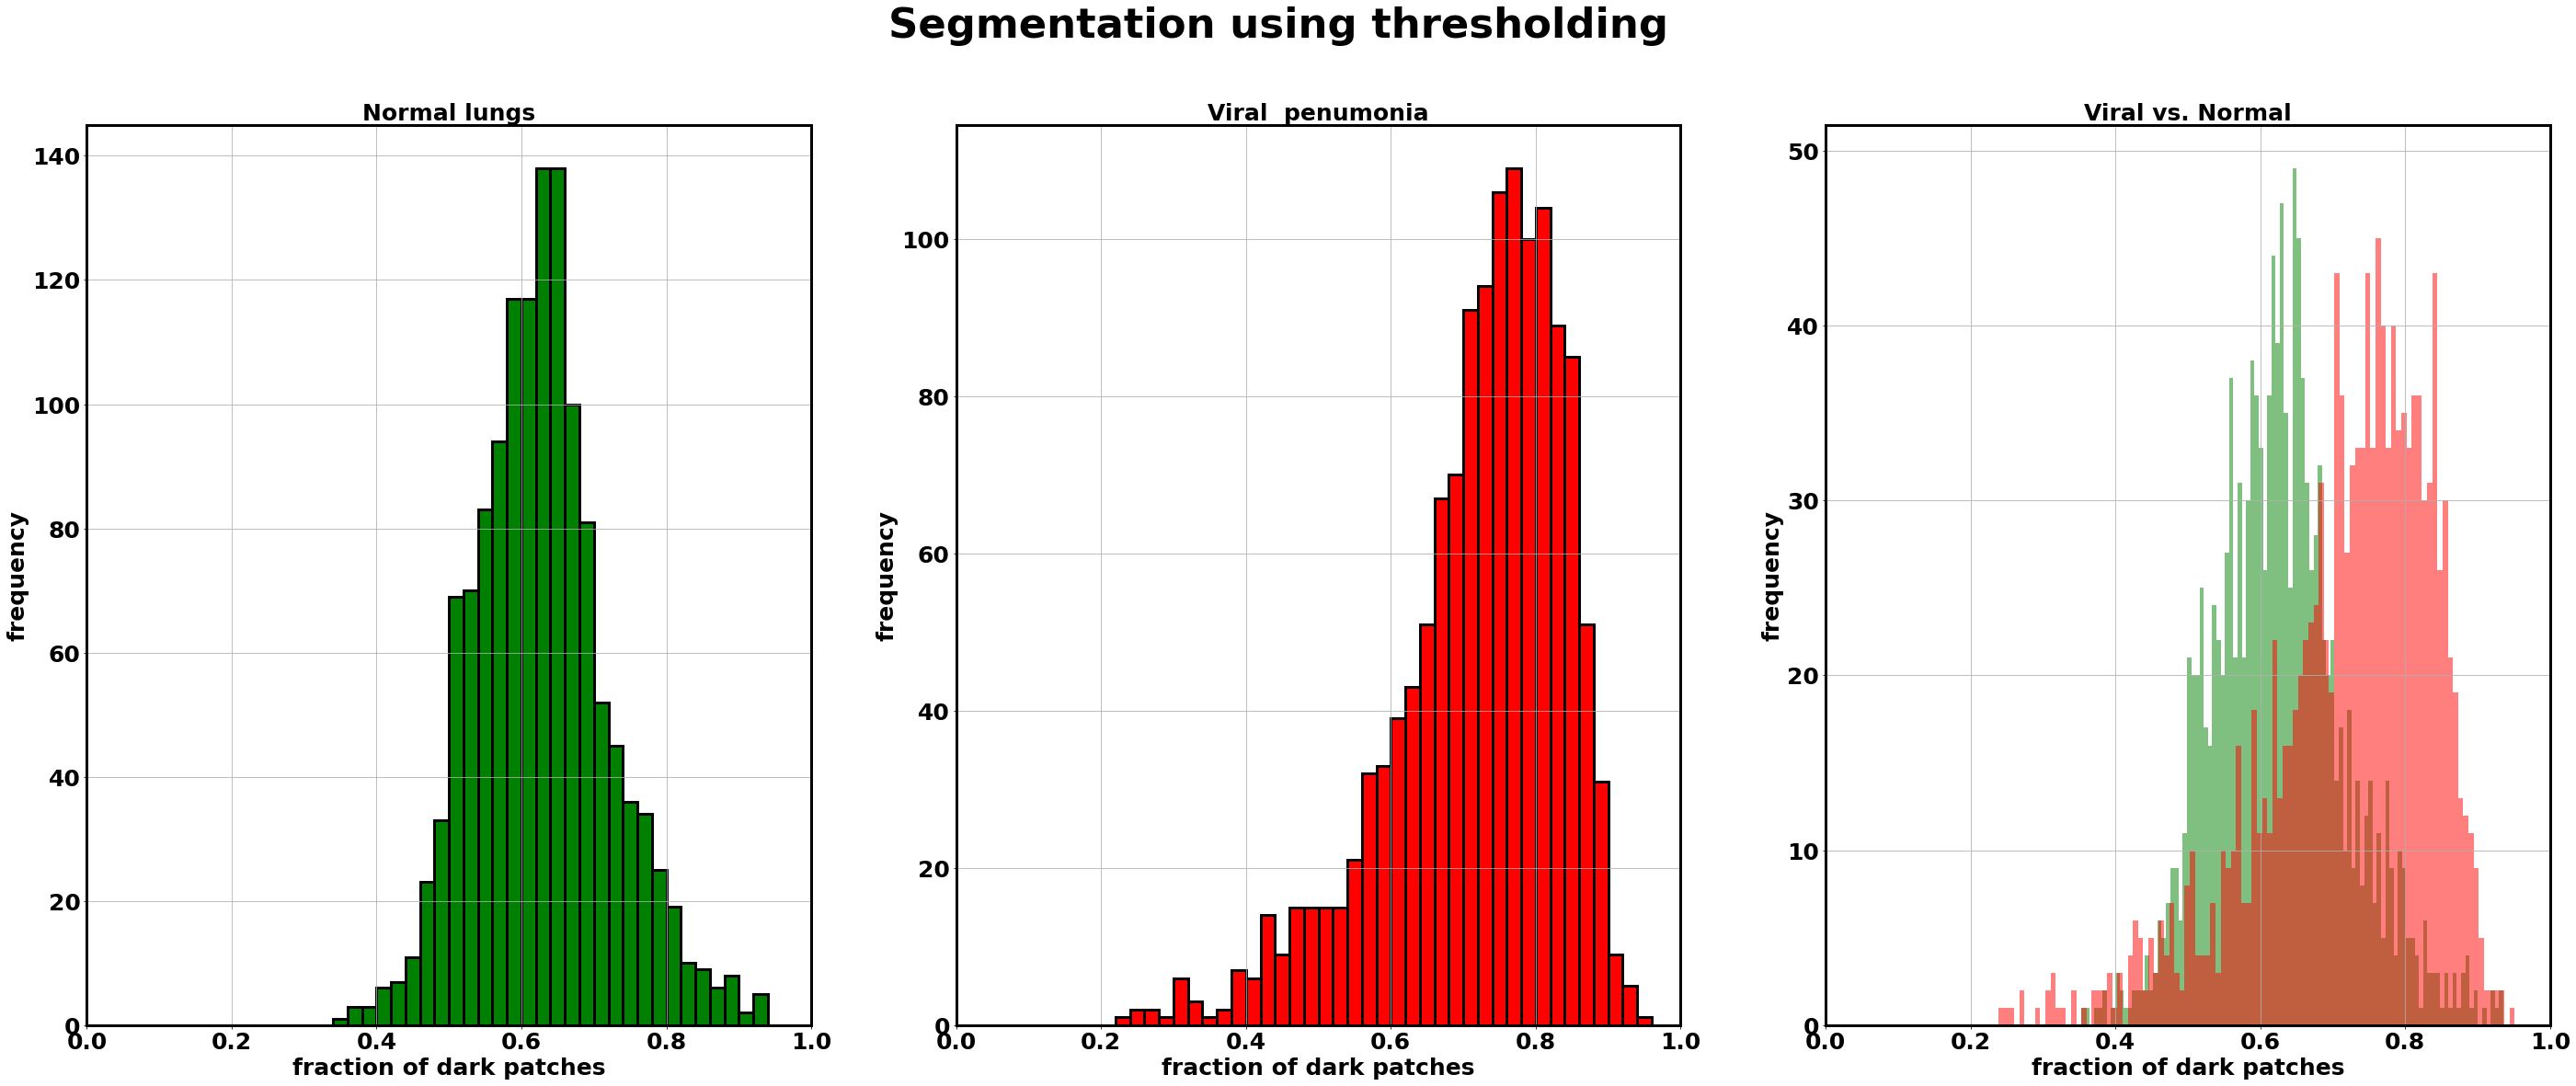

In [188]:
fs=25

plt.subplot(1,3,1)
plt.grid()
plt.hist(extract_list_from_CSV('Normal_dark_frac_segmented_thresold.csv',1),np.arange(0, 1.02, 0.02),facecolor='g',edgecolor='k',linewidth=3)
plt.xlabel("fraction of dark patches", fontsize=fs, fontweight='bold')
plt.ylabel("frequency", fontsize=fs, fontweight='bold')
plt.title("Normal lungs", fontsize=fs, fontweight='bold')
plt.xlim([0,1])
#plt.xticks([0, 1.2e5, 2.4e5,3.6e5,4.8e5], ['0', '2', '4', '6', '8'],fontsize=fs, fontweight='bold')
plt.yticks(fontsize=fs, fontweight='bold')
plt.xticks(fontsize=fs, fontweight='bold')
ax = plt.gca()
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3)

plt.subplot(1,3,2)
plt.grid()
plt.hist(extract_list_from_CSV('Viral_dark_frac_segmented_thresold.csv',1),np.arange(0, 1.02, 0.02),facecolor='r',edgecolor='k',linewidth=3)
plt.xlabel("fraction of dark patches", fontsize=fs, fontweight='bold')
plt.ylabel("frequency", fontsize=fs, fontweight='bold')
plt.title("Viral  penumonia", fontsize=fs, fontweight='bold')
plt.xlim([0,1])
#plt.xticks([0, 1.2e5, 2.4e5,3.6e5,4.8e5], ['0', '2', '4', '6', '8'],fontsize=fs, fontweight='bold')
plt.yticks(fontsize=fs, fontweight='bold')
plt.xticks(fontsize=fs, fontweight='bold')
ax = plt.gca()
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3)

plt.subplot(1,3,3)
plt.grid()
plt.hist(extract_list_from_CSV('Normal_dark_frac_segmented_thresold.csv',1), 100, alpha=0.5, facecolor='g',label='Viral')
plt.hist(extract_list_from_CSV('Viral_dark_frac_segmented_thresold.csv',1), 100, alpha=0.5, facecolor='r',label='Normal')
plt.xlabel("fraction of dark patches", fontsize=fs, fontweight='bold')
plt.ylabel("frequency", fontsize=fs, fontweight='bold')
plt.title("Viral vs. Normal", fontsize=fs, fontweight='bold')
plt.xlim([0,1])
#plt.xticks([0, 1.2e5, 2.4e5,3.6e5,4.8e5], ['0', '2', '4', '6', '8'],fontsize=fs, fontweight='bold')
plt.yticks(fontsize=fs, fontweight='bold')
plt.xticks(fontsize=fs, fontweight='bold')
ax = plt.gca()
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3)

plt.gcf().set_size_inches(48, 18)
plt.suptitle("Segmentation using thresholding", fontsize=45, fontweight='bold', color='Black')

## In this case there is non overlapping data for the two image sets. So this can be used to distinguish viral pneumonia from normal lungs!!!

## Let us finally try color masking for two types of lungs
Let us calculate the dark fraction in two types of images

In [135]:
#frac is the fraction of total rgb spectrum beyond which colors are masked
def calculate_dark_fraction_segmented_color_mask(filename,frac):
    img = cv2.imread(filename)
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    frac=0.5; #how close the 2nd color is to white
    black = (0, 0, 0)
    grey = (frac*255, frac*255, frac*255)
    mask = cv2.inRange(img, black, grey)
    result_image = cv2.bitwise_and(img, img, mask=mask)
    dark_fraction=0;
    for i in range(result_image.shape[0]):
        for j in range(result_image.shape[1]):
            b,g,r = (result_image[i, j])
            if b+g+r==0:
                dark_fraction+=1;
    dark_fraction=dark_fraction/(result_image.shape[0]*result_image.shape[1])
    return dark_fraction

In [142]:

frac=0.3; #fraction of color beyond which masking occurs
#Lists for RGB values for viral penumonia images
dark_frac_viral=[];


#Lists for RGB values for normal images
dark_frac_normal=[];

for k in range(len(df['filename'])):
    print("progress = "+str(round(k*100/len(df['filename']),2))+'%')
    if df['category'][k]=='1':
        print("viral")
        vlist=calculate_dark_fraction_segmented_color_mask(df['filename'][k],frac)
        dark_frac_viral.append(vlist)
    else:
        print("normal")
        vlist=calculate_dark_fraction_segmented_color_mask(df['filename'][k],frac)
        dark_frac_normal.append(vlist)

progress = 0.0%
viral
progress = 0.04%
viral
progress = 0.07%
viral
progress = 0.11%
viral
progress = 0.15%
viral
progress = 0.19%
viral
progress = 0.22%
viral
progress = 0.26%
viral
progress = 0.3%
viral
progress = 0.33%
viral
progress = 0.37%
viral
progress = 0.41%
viral
progress = 0.45%
viral
progress = 0.48%
viral
progress = 0.52%
viral
progress = 0.56%
viral
progress = 0.59%
viral
progress = 0.63%
viral
progress = 0.67%
viral
progress = 0.71%
viral
progress = 0.74%
viral
progress = 0.78%
viral
progress = 0.82%
viral
progress = 0.86%
viral
progress = 0.89%
viral
progress = 0.93%
viral
progress = 0.97%
viral
progress = 1.0%
viral
progress = 1.04%
viral
progress = 1.08%
viral
progress = 1.12%
viral
progress = 1.15%
viral
progress = 1.19%
viral
progress = 1.23%
viral
progress = 1.26%
viral
progress = 1.3%
viral
progress = 1.34%
viral
progress = 1.38%
viral
progress = 1.41%
viral
progress = 1.45%
viral
progress = 1.49%
viral
progress = 1.52%
viral
progress = 1.56%
viral
progress = 1.6%

progress = 13.2%
viral
progress = 13.23%
viral
progress = 13.27%
viral
progress = 13.31%
viral
progress = 13.35%
viral
progress = 13.38%
viral
progress = 13.42%
viral
progress = 13.46%
viral
progress = 13.49%
viral
progress = 13.53%
viral
progress = 13.57%
viral
progress = 13.61%
viral
progress = 13.64%
viral
progress = 13.68%
viral
progress = 13.72%
viral
progress = 13.75%
viral
progress = 13.79%
viral
progress = 13.83%
viral
progress = 13.87%
viral
progress = 13.9%
viral
progress = 13.94%
viral
progress = 13.98%
viral
progress = 14.01%
viral
progress = 14.05%
viral
progress = 14.09%
viral
progress = 14.13%
viral
progress = 14.16%
viral
progress = 14.2%
viral
progress = 14.24%
viral
progress = 14.28%
viral
progress = 14.31%
viral
progress = 14.35%
viral
progress = 14.39%
viral
progress = 14.42%
viral
progress = 14.46%
viral
progress = 14.5%
viral
progress = 14.54%
viral
progress = 14.57%
viral
progress = 14.61%
viral
progress = 14.65%
viral
progress = 14.68%
viral
progress = 14.72%
vi

progress = 25.95%
viral
progress = 25.99%
viral
progress = 26.02%
viral
progress = 26.06%
viral
progress = 26.1%
viral
progress = 26.13%
viral
progress = 26.17%
viral
progress = 26.21%
viral
progress = 26.25%
viral
progress = 26.28%
viral
progress = 26.32%
viral
progress = 26.36%
viral
progress = 26.39%
viral
progress = 26.43%
viral
progress = 26.47%
viral
progress = 26.51%
viral
progress = 26.54%
viral
progress = 26.58%
viral
progress = 26.62%
viral
progress = 26.65%
viral
progress = 26.69%
viral
progress = 26.73%
viral
progress = 26.77%
viral
progress = 26.8%
viral
progress = 26.84%
viral
progress = 26.88%
viral
progress = 26.91%
viral
progress = 26.95%
viral
progress = 26.99%
viral
progress = 27.03%
viral
progress = 27.06%
viral
progress = 27.1%
viral
progress = 27.14%
viral
progress = 27.17%
viral
progress = 27.21%
viral
progress = 27.25%
viral
progress = 27.29%
viral
progress = 27.32%
viral
progress = 27.36%
viral
progress = 27.4%
viral
progress = 27.43%
viral
progress = 27.47%
vi

progress = 38.7%
viral
progress = 38.74%
viral
progress = 38.77%
viral
progress = 38.81%
viral
progress = 38.85%
viral
progress = 38.88%
viral
progress = 38.92%
viral
progress = 38.96%
viral
progress = 39.0%
viral
progress = 39.03%
viral
progress = 39.07%
viral
progress = 39.11%
viral
progress = 39.14%
viral
progress = 39.18%
viral
progress = 39.22%
viral
progress = 39.26%
viral
progress = 39.29%
viral
progress = 39.33%
viral
progress = 39.37%
viral
progress = 39.41%
viral
progress = 39.44%
viral
progress = 39.48%
viral
progress = 39.52%
viral
progress = 39.55%
viral
progress = 39.59%
viral
progress = 39.63%
viral
progress = 39.67%
viral
progress = 39.7%
viral
progress = 39.74%
viral
progress = 39.78%
viral
progress = 39.81%
viral
progress = 39.85%
viral
progress = 39.89%
viral
progress = 39.93%
viral
progress = 39.96%
viral
progress = 40.0%
viral
progress = 40.04%
viral
progress = 40.07%
viral
progress = 40.11%
viral
progress = 40.15%
viral
progress = 40.19%
viral
progress = 40.22%
vi

progress = 51.41%
normal
progress = 51.45%
normal
progress = 51.49%
normal
progress = 51.52%
normal
progress = 51.56%
normal
progress = 51.6%
normal
progress = 51.64%
normal
progress = 51.67%
normal
progress = 51.71%
normal
progress = 51.75%
normal
progress = 51.78%
normal
progress = 51.82%
normal
progress = 51.86%
normal
progress = 51.9%
normal
progress = 51.93%
normal
progress = 51.97%
normal
progress = 52.01%
normal
progress = 52.04%
normal
progress = 52.08%
normal
progress = 52.12%
normal
progress = 52.16%
normal
progress = 52.19%
normal
progress = 52.23%
normal
progress = 52.27%
normal
progress = 52.3%
normal
progress = 52.34%
normal
progress = 52.38%
normal
progress = 52.42%
normal
progress = 52.45%
normal
progress = 52.49%
normal
progress = 52.53%
normal
progress = 52.57%
normal
progress = 52.6%
normal
progress = 52.64%
normal
progress = 52.68%
normal
progress = 52.71%
normal
progress = 52.75%
normal
progress = 52.79%
normal
progress = 52.83%
normal
progress = 52.86%
normal
prog

progress = 63.68%
normal
progress = 63.72%
normal
progress = 63.75%
normal
progress = 63.79%
normal
progress = 63.83%
normal
progress = 63.87%
normal
progress = 63.9%
normal
progress = 63.94%
normal
progress = 63.98%
normal
progress = 64.01%
normal
progress = 64.05%
normal
progress = 64.09%
normal
progress = 64.13%
normal
progress = 64.16%
normal
progress = 64.2%
normal
progress = 64.24%
normal
progress = 64.28%
normal
progress = 64.31%
normal
progress = 64.35%
normal
progress = 64.39%
normal
progress = 64.42%
normal
progress = 64.46%
normal
progress = 64.5%
normal
progress = 64.54%
normal
progress = 64.57%
normal
progress = 64.61%
normal
progress = 64.65%
normal
progress = 64.68%
normal
progress = 64.72%
normal
progress = 64.76%
normal
progress = 64.8%
normal
progress = 64.83%
normal
progress = 64.87%
normal
progress = 64.91%
normal
progress = 64.94%
normal
progress = 64.98%
normal
progress = 65.02%
normal
progress = 65.06%
normal
progress = 65.09%
normal
progress = 65.13%
normal
prog

progress = 75.95%
normal
progress = 75.99%
normal
progress = 76.02%
normal
progress = 76.06%
normal
progress = 76.1%
normal
progress = 76.13%
normal
progress = 76.17%
normal
progress = 76.21%
normal
progress = 76.25%
normal
progress = 76.28%
normal
progress = 76.32%
normal
progress = 76.36%
normal
progress = 76.39%
normal
progress = 76.43%
normal
progress = 76.47%
normal
progress = 76.51%
normal
progress = 76.54%
normal
progress = 76.58%
normal
progress = 76.62%
normal
progress = 76.65%
normal
progress = 76.69%
normal
progress = 76.73%
normal
progress = 76.77%
normal
progress = 76.8%
normal
progress = 76.84%
normal
progress = 76.88%
normal
progress = 76.91%
normal
progress = 76.95%
normal
progress = 76.99%
normal
progress = 77.03%
normal
progress = 77.06%
normal
progress = 77.1%
normal
progress = 77.14%
normal
progress = 77.17%
normal
progress = 77.21%
normal
progress = 77.25%
normal
progress = 77.29%
normal
progress = 77.32%
normal
progress = 77.36%
normal
progress = 77.4%
normal
prog

progress = 88.22%
normal
progress = 88.25%
normal
progress = 88.29%
normal
progress = 88.33%
normal
progress = 88.36%
normal
progress = 88.4%
normal
progress = 88.44%
normal
progress = 88.48%
normal
progress = 88.51%
normal
progress = 88.55%
normal
progress = 88.59%
normal
progress = 88.62%
normal
progress = 88.66%
normal
progress = 88.7%
normal
progress = 88.74%
normal
progress = 88.77%
normal
progress = 88.81%
normal
progress = 88.85%
normal
progress = 88.88%
normal
progress = 88.92%
normal
progress = 88.96%
normal
progress = 89.0%
normal
progress = 89.03%
normal
progress = 89.07%
normal
progress = 89.11%
normal
progress = 89.14%
normal
progress = 89.18%
normal
progress = 89.22%
normal
progress = 89.26%
normal
progress = 89.29%
normal
progress = 89.33%
normal
progress = 89.37%
normal
progress = 89.41%
normal
progress = 89.44%
normal
progress = 89.48%
normal
progress = 89.52%
normal
progress = 89.55%
normal
progress = 89.59%
normal
progress = 89.63%
normal
progress = 89.67%
normal
pro

In [143]:
#Save data to files 
#dict = {'DF': dark_frac_normal}  
       
#dff = pd.DataFrame(dict) 
    
# saving the dataframe 
#dff.to_csv('Normal_dark_frac_segmented_masking_frac_pt_3.csv') 

# dictionary of lists  
#dict = {'DF': dark_frac_viral}  
       
#dff = pd.DataFrame(dict) 
    
# saving the dataframe 
#dff.to_csv('Viral_dark_frac_segmented_masking_frac_pt_3.csv') 

## Check overlap

Text(0.5, 0.98, 'Segmentation using masking, frac=0.5')

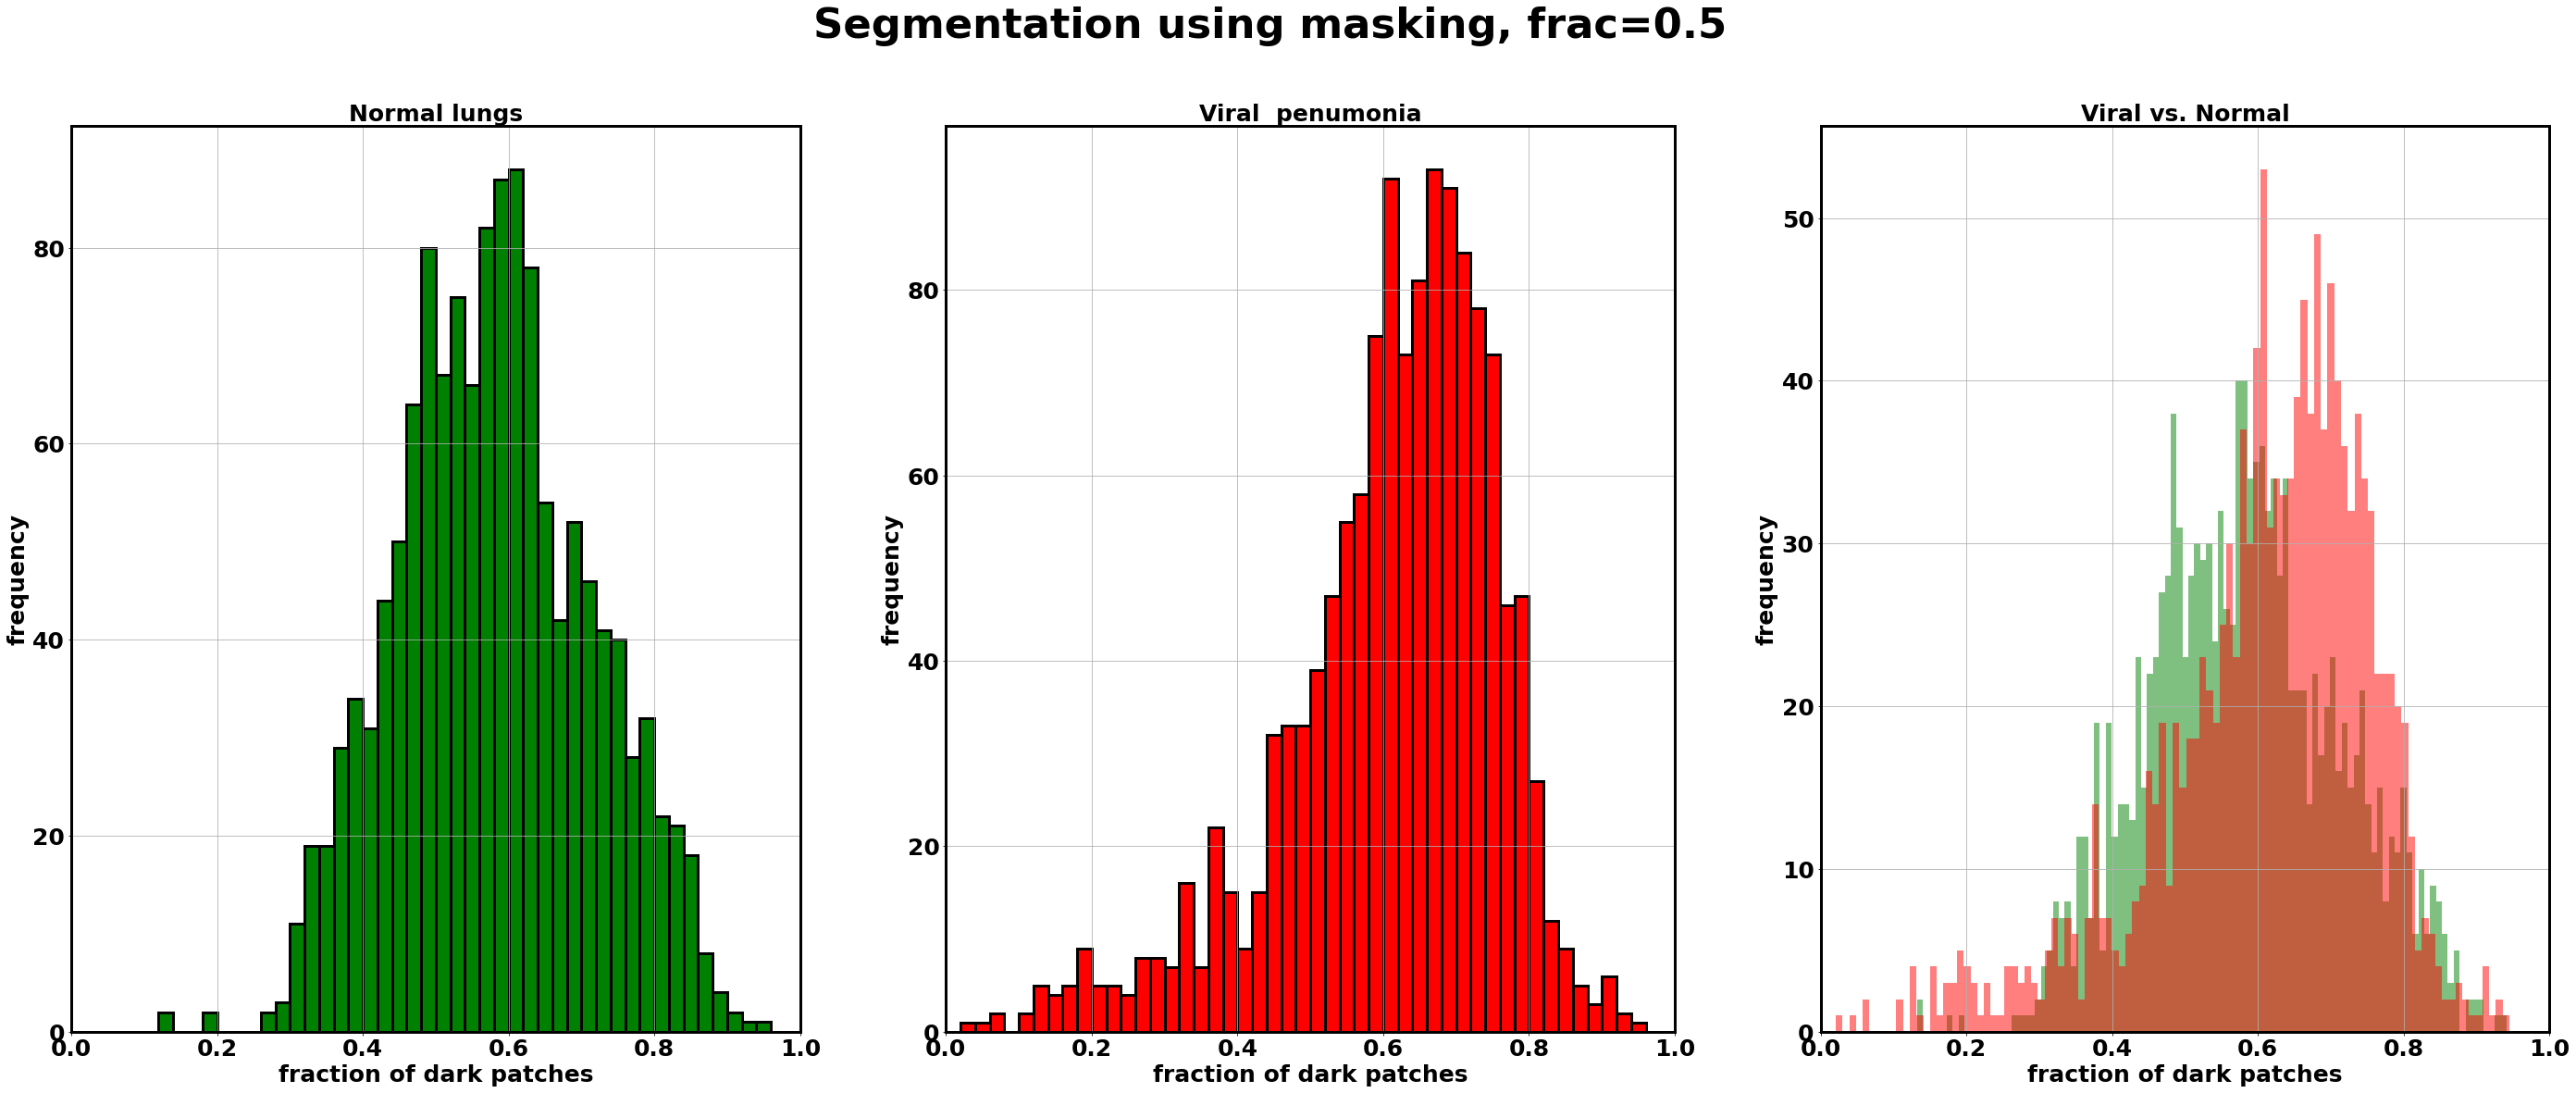

In [189]:
fs=25

plt.subplot(1,3,1)
plt.grid()
plt.hist(extract_list_from_CSV('Normal_dark_frac_segmented_masking_frac_pt_5.csv',1),np.arange(0, 1.02, 0.02),facecolor='g',edgecolor='k',linewidth=3)
plt.xlabel("fraction of dark patches", fontsize=fs, fontweight='bold')
plt.ylabel("frequency", fontsize=fs, fontweight='bold')
plt.title("Normal lungs", fontsize=fs, fontweight='bold')
plt.xlim([0,1])
#plt.xticks([0, 1.2e5, 2.4e5,3.6e5,4.8e5], ['0', '2', '4', '6', '8'],fontsize=fs, fontweight='bold')
plt.yticks(fontsize=fs, fontweight='bold')
plt.xticks(fontsize=fs, fontweight='bold')
ax = plt.gca()
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3)

plt.subplot(1,3,2)
plt.grid()
plt.hist(extract_list_from_CSV('Viral_dark_frac_segmented_masking_frac_pt_5.csv',1),np.arange(0, 1.02, 0.02),facecolor='r',edgecolor='k',linewidth=3)
plt.xlabel("fraction of dark patches", fontsize=fs, fontweight='bold')
plt.ylabel("frequency", fontsize=fs, fontweight='bold')
plt.title("Viral  penumonia", fontsize=fs, fontweight='bold')
plt.xlim([0,1])
#plt.xticks([0, 1.2e5, 2.4e5,3.6e5,4.8e5], ['0', '2', '4', '6', '8'],fontsize=fs, fontweight='bold')
plt.yticks(fontsize=fs, fontweight='bold')
plt.xticks(fontsize=fs, fontweight='bold')
ax = plt.gca()
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3)

plt.subplot(1,3,3)
plt.grid()
plt.hist(extract_list_from_CSV('Normal_dark_frac_segmented_masking_frac_pt_5.csv',1), 100, alpha=0.5, facecolor='g',label='Viral')
plt.hist(extract_list_from_CSV('Viral_dark_frac_segmented_masking_frac_pt_5.csv',1), 100, alpha=0.5, facecolor='r',label='Normal')
plt.xlabel("fraction of dark patches", fontsize=fs, fontweight='bold')
plt.ylabel("frequency", fontsize=fs, fontweight='bold')
plt.title("Viral vs. Normal", fontsize=fs, fontweight='bold')
plt.xlim([0,1])
#plt.xticks([0, 1.2e5, 2.4e5,3.6e5,4.8e5], ['0', '2', '4', '6', '8'],fontsize=fs, fontweight='bold')
plt.yticks(fontsize=fs, fontweight='bold')
plt.xticks(fontsize=fs, fontweight='bold')
ax = plt.gca()
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3)

plt.gcf().set_size_inches(48, 18)
plt.suptitle("Segmentation using masking, frac=0.5", fontsize=45, fontweight='bold', color='Black')

Text(0.5, 0.98, 'Segmentation using masking, frac=0.3')

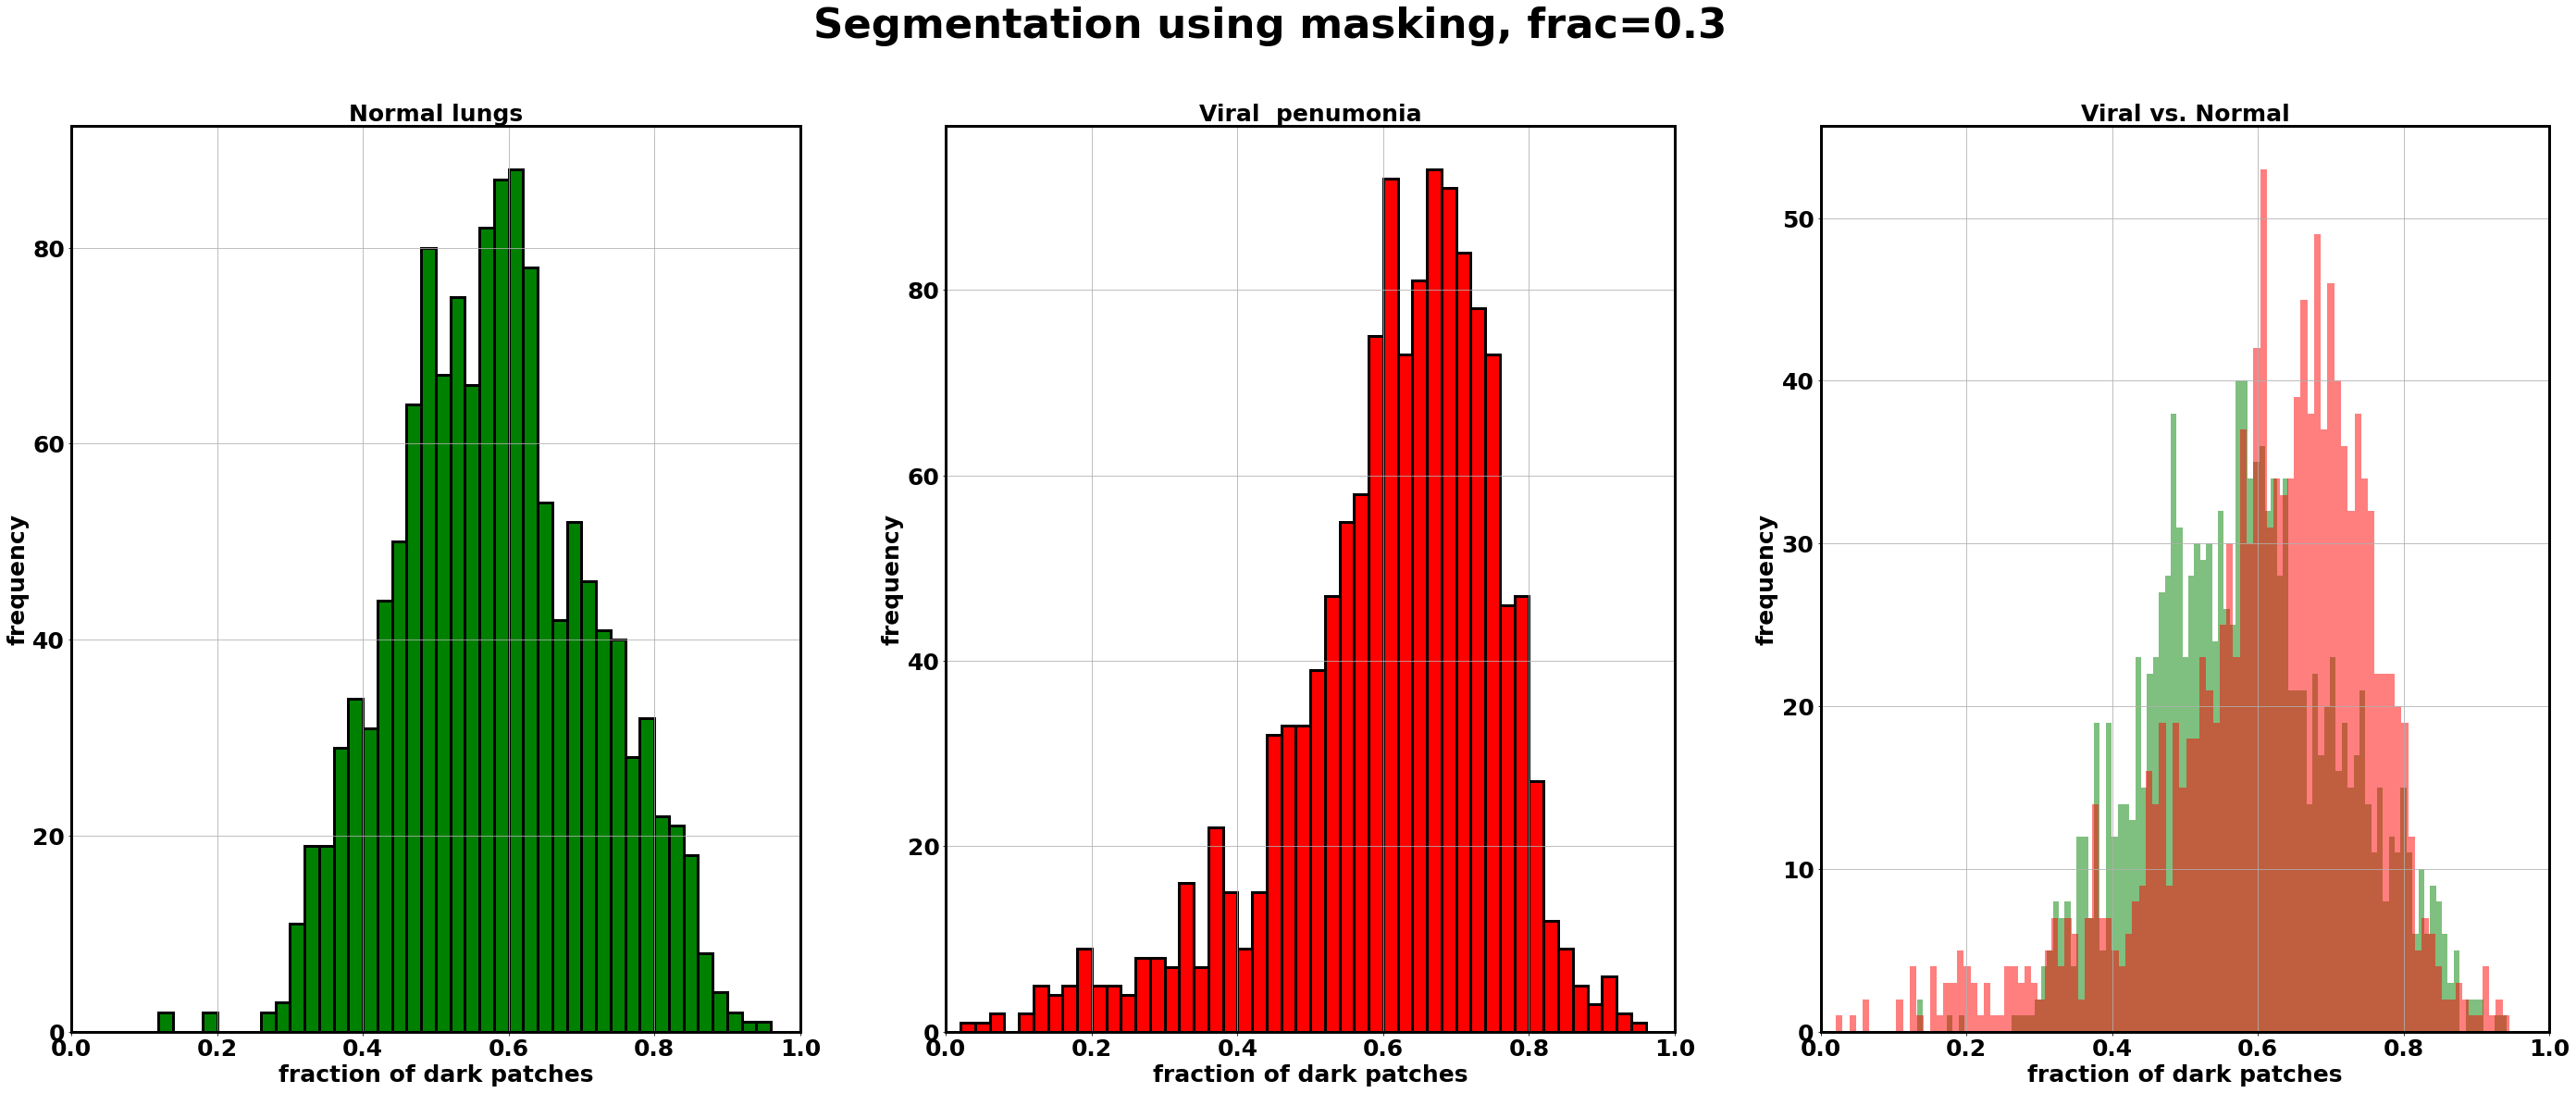

In [190]:
fs=25

plt.subplot(1,3,1)
plt.grid()
plt.hist(extract_list_from_CSV('Normal_dark_frac_segmented_masking_frac_pt_3.csv',1),np.arange(0, 1.02, 0.02),facecolor='g',edgecolor='k',linewidth=3)
plt.xlabel("fraction of dark patches", fontsize=fs, fontweight='bold')
plt.ylabel("frequency", fontsize=fs, fontweight='bold')
plt.title("Normal lungs", fontsize=fs, fontweight='bold')
plt.xlim([0,1])
#plt.xticks([0, 1.2e5, 2.4e5,3.6e5,4.8e5], ['0', '2', '4', '6', '8'],fontsize=fs, fontweight='bold')
plt.yticks(fontsize=fs, fontweight='bold')
plt.xticks(fontsize=fs, fontweight='bold')
ax = plt.gca()
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3)

plt.subplot(1,3,2)
plt.grid()
plt.hist(extract_list_from_CSV('Viral_dark_frac_segmented_masking_frac_pt_3.csv',1),np.arange(0, 1.02, 0.02),facecolor='r',edgecolor='k',linewidth=3)
plt.xlabel("fraction of dark patches", fontsize=fs, fontweight='bold')
plt.ylabel("frequency", fontsize=fs, fontweight='bold')
plt.title("Viral  penumonia", fontsize=fs, fontweight='bold')
plt.xlim([0,1])
#plt.xticks([0, 1.2e5, 2.4e5,3.6e5,4.8e5], ['0', '2', '4', '6', '8'],fontsize=fs, fontweight='bold')
plt.yticks(fontsize=fs, fontweight='bold')
plt.xticks(fontsize=fs, fontweight='bold')
ax = plt.gca()
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3)

plt.subplot(1,3,3)
plt.grid()
plt.hist(extract_list_from_CSV('Normal_dark_frac_segmented_masking_frac_pt_3.csv',1), 100, alpha=0.5, facecolor='g',label='Viral')
plt.hist(extract_list_from_CSV('Viral_dark_frac_segmented_masking_frac_pt_3.csv',1), 100, alpha=0.5, facecolor='r',label='Normal')
plt.xlabel("fraction of dark patches", fontsize=fs, fontweight='bold')
plt.ylabel("frequency", fontsize=fs, fontweight='bold')
plt.title("Viral vs. Normal", fontsize=fs, fontweight='bold')
plt.xlim([0,1])
#plt.xticks([0, 1.2e5, 2.4e5,3.6e5,4.8e5], ['0', '2', '4', '6', '8'],fontsize=fs, fontweight='bold')
plt.yticks(fontsize=fs, fontweight='bold')
plt.xticks(fontsize=fs, fontweight='bold')
ax = plt.gca()
for axis in ['top','bottom','left','right']:
  ax.spines[axis].set_linewidth(3)

plt.gcf().set_size_inches(48, 18)
plt.suptitle("Segmentation using masking, frac=0.3", fontsize=45, fontweight='bold', color='Black')

## Segmentation using masking can also be a great way to differentiate normal lungs from viral pneumonia lungs